
# MAAS, mid-CC activation, & ANT-score (Attention Network Task) Analysis 
## Python Project: does the change in Mindfulness Attention Awareness Scale (MAAS) explain some of the relationship between the increase of activation in a region of the mid-cingulate cortex and the decreased reaction times in the ANT-Score (improved cognitive performance) for the alerting network of attention. 
### Required:
<ul>
    <li><b> load source data from a file </b></li>
    <li><b> plot at least one histogram of the data, with title and labelled axes </b></li>
    <li><b>  create at least one plot of analysis results, with title and labelled axes </b></li>
    <li><b> use at least one numpy array </b></li>
    <li><b>use short but descriptive variable names in your code </b></li>
    <li><b>document your code: use markdown in your .ipynb and/or directly comment your python code with # or ''' or """ </b></li>
    <li><b>try and be succint, while keeping the code readable </b></li>
</ul>

### Plus do at least 6 of the following:
<ul>
   <li><b> use an if-elif-else clause </b></li>
   <li><b> use a for loop </b></li>
   <li> use a while loop </li>
   <li><b> write at least one function, include a docstring </b></li>
   <li><b> print out some results in at least one nicely formatted string, using string operator % or .format() method </b></li>
    <li><b> use at least one vectorized math operation on an array</b> </li>
    <li><b> create a figure with multiple axes (i.e., use plt.subplots(nrows, ncols))</b></li>
    <li><b> do a statistical test - show that the test assumptions hold for your data</b> </li>
    <li><b>manipulate and analyze data in a pandas series or dataframe </b></li>
    <li> use an image processing algorithm </li>
    <li> use a clustering algorithm </li>
    <li><b> use some other non-trivial algorithm: e.g. regression, curve fitting, signal analysis… </b></li>
    <li> version control your code using git: create a local repository and make at least 5 commits while developing your code </li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#loading MAAS, fMRI weighted estimates, and ANT-scores source data from file
MAAS_Data = pd.read_csv('/Users/mariamora/Documents/PhD/Courses/3rd_Year/Python/Final_project/source_data/MAAS_Data.csv')
ANT_Data = pd.read_csv("/Users/mariamora/Documents/PhD/Courses/3rd_Year/Python/Final_project/source_data/export_4way_mixedANOVA_raw_v3_mediation.csv")
fMRI_Data_exp = pd.read_csv("/Users/mariamora/Documents/PhD/Courses/3rd_Year/Python/Final_project/source_data/Alerting_exp_weightedParameterEstimates.csv", sep = '\s+', names =["subject", "fMRI_signal"])
fMRI_Data_con = pd.read_csv("/Users/mariamora/Documents/PhD/Courses/3rd_Year/Python/Final_project/source_data/Alerting_con_weightedParameterEstimates.csv", sep = '\s+', names =["subject", "fMRI_signal"])

subjects_ANT = ANT_Data.groupby('id').count().reset_index()

fMRI_Data_con[['subject','TP']] = fMRI_Data_con['subject'].str.split('_',expand=True)
fMRI_Data_exp[['subject','TP']] =fMRI_Data_exp['subject'].str.split('_',expand=True)

#check if subjects_ANT and MAAS_Data are the same
print(np.where(MAAS_Data['id'] != subjects_ANT['id']))


##to visualize DataFrames
#MAAS_Data 
#subjects_ANT
#fMRI_Data_exp
#fMRI_Data_con

(array([], dtype=int64),)


### Plotting data histograms


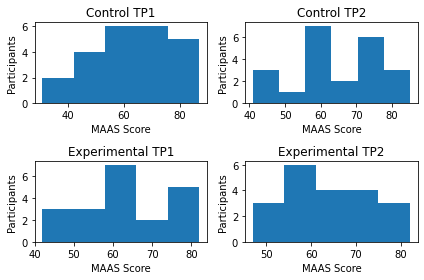

In [2]:
#plotting MAAS histograms
MAAS_con_TP1 = np.array(MAAS_Data.loc[MAAS_Data['GROUP'] == 'con']['TP1'])
MAAS_con_TP2 = np.array(MAAS_Data.loc[MAAS_Data['GROUP'] == 'con']['TP2'])
MAAS_exp_TP1 = np.array(MAAS_Data.loc[MAAS_Data['GROUP'] == 'exp']['TP1'])
MAAS_exp_TP2 = np.array(MAAS_Data.loc[MAAS_Data['GROUP'] == 'exp']['TP2'])

f, axs = plt.subplots(nrows=2, ncols=2)
axs[0,0].hist(MAAS_con_TP1, bins = 5)
axs[0,0].set_title('Control TP1')
axs[0,0].set_xlabel('MAAS Score')
axs[0,0].set_ylabel('Participants')

axs[0,1].hist(MAAS_con_TP2[~np.isnan(MAAS_con_TP2)], bins = 6)
axs[0,1].set_title('Control TP2')
axs[0,1].set_xlabel('MAAS Score')
axs[0,1].set_ylabel('Participants')

axs[1,0].hist(MAAS_exp_TP1, bins = 5)
axs[1,0].set_title('Experimental TP1')
axs[1,0].set_xlabel('MAAS Score')
axs[1,0].set_ylabel('Participants')

axs[1,1].hist(MAAS_exp_TP2, bins = 5)
axs[1,1].set_title('Experimental TP2')
axs[1,1].set_xlabel('MAAS Score')
axs[1,1].set_ylabel('Participants')

f.tight_layout()
#MAAS_con_TP2 

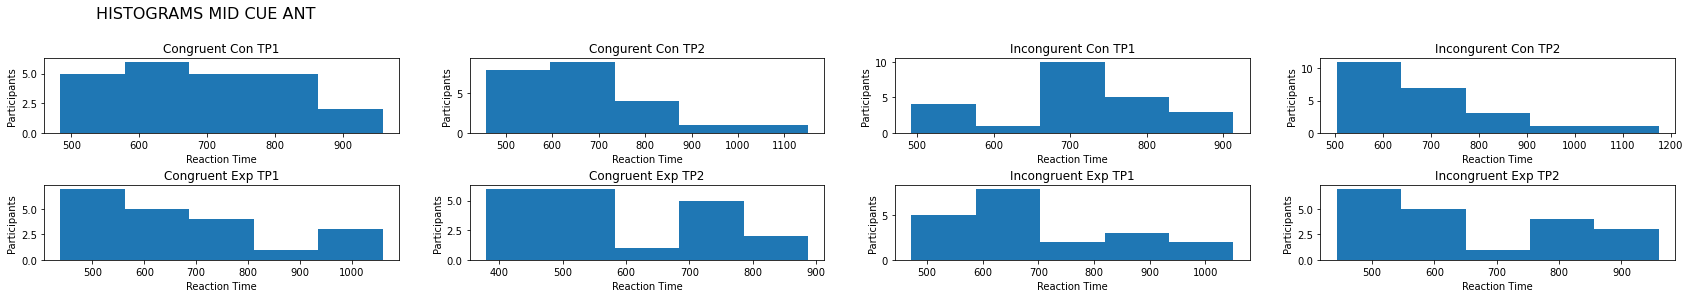

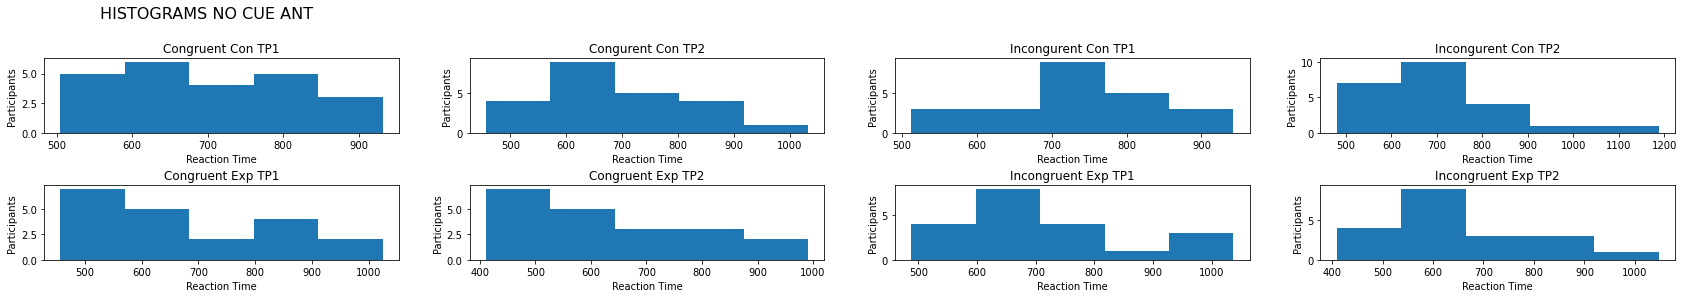

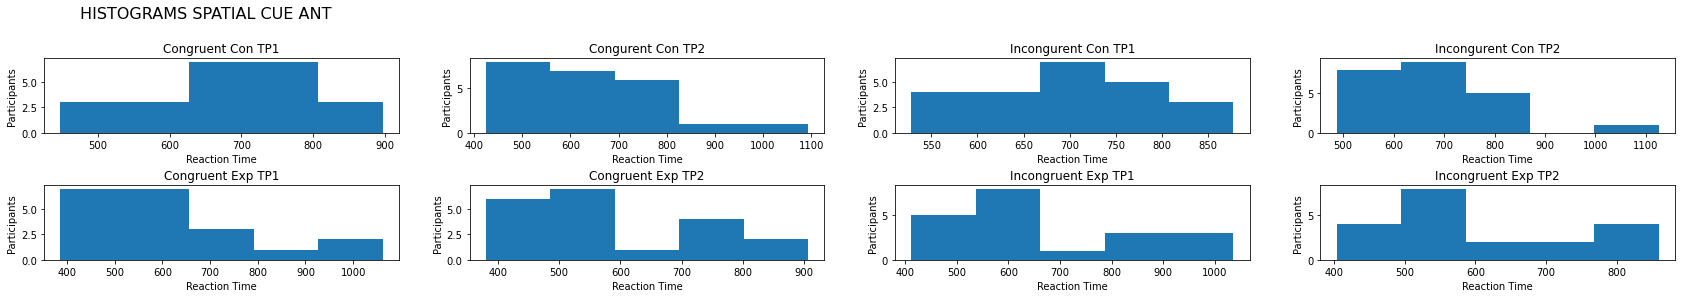

In [3]:
#plotting ANT-Score histograms
ANT_MID_C_con_TP1 = np.array(ANT_Data.loc[(ANT_Data['GROUP'] == 'CON') & (ANT_Data['CUE'] == 'MID_CUE') & (ANT_Data['TARGET'] == 'Congruent')]['TP1'])
ANT_MID_C_con_TP2 = np.array(ANT_Data.loc[(ANT_Data['GROUP'] == 'CON') & (ANT_Data['CUE'] == 'MID_CUE') & (ANT_Data['TARGET'] == 'Congruent')]['TP2'])
ANT_MID_I_con_TP1 = np.array(ANT_Data.loc[(ANT_Data['GROUP'] == 'CON') & (ANT_Data['CUE'] == 'MID_CUE') & (ANT_Data['TARGET'] == 'Incongruent')]['TP1'])
ANT_MID_I_con_TP2 = np.array(ANT_Data.loc[(ANT_Data['GROUP'] == 'CON') & (ANT_Data['CUE'] == 'MID_CUE') & (ANT_Data['TARGET'] == 'Incongruent')]['TP2'])

ANT_NO_C_con_TP1 = np.array(ANT_Data.loc[(ANT_Data['GROUP'] == 'CON') & (ANT_Data['CUE'] == 'NO_CUE') & (ANT_Data['TARGET'] == 'Congruent')]['TP1'])
ANT_NO_C_con_TP2 = np.array(ANT_Data.loc[(ANT_Data['GROUP'] == 'CON') & (ANT_Data['CUE'] == 'NO_CUE') & (ANT_Data['TARGET'] == 'Congruent')]['TP2'])
ANT_NO_I_con_TP1 = np.array(ANT_Data.loc[(ANT_Data['GROUP'] == 'CON') & (ANT_Data['CUE'] == 'NO_CUE') & (ANT_Data['TARGET'] == 'Incongruent')]['TP1'])
ANT_NO_I_con_TP2 = np.array(ANT_Data.loc[(ANT_Data['GROUP'] == 'CON') & (ANT_Data['CUE'] == 'NO_CUE') & (ANT_Data['TARGET'] == 'Incongruent')]['TP2'])

ANT_SPATIAL_C_con_TP1 = np.array(ANT_Data.loc[(ANT_Data['GROUP'] == 'CON') & (ANT_Data['CUE'] == 'SPATIAL_CUE') & (ANT_Data['TARGET'] == 'Congruent')]['TP1'])
ANT_SPATIAL_C_con_TP2 = np.array(ANT_Data.loc[(ANT_Data['GROUP'] == 'CON') & (ANT_Data['CUE'] == 'SPATIAL_CUE') & (ANT_Data['TARGET'] == 'Congruent')]['TP2'])
ANT_SPATIAL_I_con_TP1 = np.array(ANT_Data.loc[(ANT_Data['GROUP'] == 'CON') & (ANT_Data['CUE'] == 'SPATIAL_CUE') & (ANT_Data['TARGET'] == 'Incongruent')]['TP1'])
ANT_SPATIAL_I_con_TP2 = np.array(ANT_Data.loc[(ANT_Data['GROUP'] == 'CON') & (ANT_Data['CUE'] == 'SPATIAL_CUE') & (ANT_Data['TARGET'] == 'Incongruent')]['TP2'])

ANT_MID_C_exp_TP1 = np.array(ANT_Data.loc[(ANT_Data['GROUP'] == 'EXP') & (ANT_Data['CUE'] == 'MID_CUE') & (ANT_Data['TARGET'] == 'Congruent')]['TP1'])
ANT_MID_C_exp_TP2 = np.array(ANT_Data.loc[(ANT_Data['GROUP'] == 'EXP') & (ANT_Data['CUE'] == 'MID_CUE') & (ANT_Data['TARGET'] == 'Congruent')]['TP2'])
ANT_MID_I_exp_TP1 = np.array(ANT_Data.loc[(ANT_Data['GROUP'] == 'EXP') & (ANT_Data['CUE'] == 'MID_CUE') & (ANT_Data['TARGET'] == 'Incongruent')]['TP1'])
ANT_MID_I_exp_TP2 = np.array(ANT_Data.loc[(ANT_Data['GROUP'] == 'EXP') & (ANT_Data['CUE'] == 'MID_CUE') & (ANT_Data['TARGET'] == 'Incongruent')]['TP2'])

ANT_NO_C_exp_TP1 = np.array(ANT_Data.loc[(ANT_Data['GROUP'] == 'EXP') & (ANT_Data['CUE'] == 'NO_CUE') & (ANT_Data['TARGET'] == 'Congruent')]['TP1'])
ANT_NO_C_exp_TP2 = np.array(ANT_Data.loc[(ANT_Data['GROUP'] == 'EXP') & (ANT_Data['CUE'] == 'NO_CUE') & (ANT_Data['TARGET'] == 'Congruent')]['TP2'])
ANT_NO_I_exp_TP1 = np.array(ANT_Data.loc[(ANT_Data['GROUP'] == 'EXP') & (ANT_Data['CUE'] == 'NO_CUE') & (ANT_Data['TARGET'] == 'Incongruent')]['TP1'])
ANT_NO_I_exp_TP2 = np.array(ANT_Data.loc[(ANT_Data['GROUP'] == 'EXP') & (ANT_Data['CUE'] == 'NO_CUE') & (ANT_Data['TARGET'] == 'Incongruent')]['TP2'])

ANT_SPATIAL_C_exp_TP1 = np.array(ANT_Data.loc[(ANT_Data['GROUP'] == 'EXP') & (ANT_Data['CUE'] == 'SPATIAL_CUE') & (ANT_Data['TARGET'] == 'Congruent')]['TP1'])
ANT_SPATIAL_C_exp_TP2 = np.array(ANT_Data.loc[(ANT_Data['GROUP'] == 'EXP') & (ANT_Data['CUE'] == 'SPATIAL_CUE') & (ANT_Data['TARGET'] == 'Congruent')]['TP2'])
ANT_SPATIAL_I_exp_TP1 = np.array(ANT_Data.loc[(ANT_Data['GROUP'] == 'EXP') & (ANT_Data['CUE'] == 'SPATIAL_CUE') & (ANT_Data['TARGET'] == 'Incongruent')]['TP1'])
ANT_SPATIAL_I_exp_TP2 = np.array(ANT_Data.loc[(ANT_Data['GROUP'] == 'EXP') & (ANT_Data['CUE'] == 'SPATIAL_CUE') & (ANT_Data['TARGET'] == 'Incongruent')]['TP2'])


f1, axs1 = plt.subplots(nrows=2, ncols=4)
f1.suptitle('HISTOGRAMS MID CUE ANT', fontsize=16)

axs1[0,0].hist(ANT_MID_C_con_TP1, bins = 5)
axs1[0,0].set_title('Congruent Con TP1')
axs1[0,0].set_xlabel('Reaction Time')
axs1[0,0].set_ylabel('Participants')

axs1[0,1].hist(ANT_MID_C_con_TP2, bins = 5)
axs1[0,1].set_title('Congurent Con TP2')
axs1[0,1].set_xlabel('Reaction Time')
axs1[0,1].set_ylabel('Participants')

axs1[0,2].hist(ANT_MID_I_con_TP1, bins = 5)
axs1[0,2].set_title('Incongurent Con TP1')
axs1[0,2].set_xlabel('Reaction Time')
axs1[0,2].set_ylabel('Participants')

axs1[0,3].hist(ANT_MID_I_con_TP2[~np.isnan(ANT_MID_I_con_TP2)], bins = 5)
axs1[0,3].set_title('Incongurent Con TP2')
axs1[0,3].set_xlabel('Reaction Time')
axs1[0,3].set_ylabel('Participants')

axs1[1,0].hist(ANT_MID_C_exp_TP1, bins = 5)
axs1[1,0].set_title('Congruent Exp TP1')
axs1[1,0].set_xlabel('Reaction Time')
axs1[1,0].set_ylabel('Participants')

axs1[1,1].hist(ANT_MID_C_exp_TP2, bins = 5)
axs1[1,1].set_title('Congruent Exp TP2')
axs1[1,1].set_xlabel('Reaction Time')
axs1[1,1].set_ylabel('Participants')

axs1[1,2].hist(ANT_MID_I_exp_TP1, bins = 5)
axs1[1,2].set_title('Incongruent Exp TP1')
axs1[1,2].set_xlabel('Reaction Time')
axs1[1,2].set_ylabel('Participants')

axs1[1,3].hist(ANT_MID_I_exp_TP2, bins = 5)
axs1[1,3].set_title('Incongruent Exp TP2')
axs1[1,3].set_xlabel('Reaction Time')
axs1[1,3].set_ylabel('Participants')

f1.subplots_adjust(left=0.125, right=3.9, bottom=0.1, top=0.8, wspace=0.2, hspace=0.7)

f2, axs2 = plt.subplots(nrows=2, ncols=4)
f2.suptitle('HISTOGRAMS NO CUE ANT', fontsize=16)

axs2[0,0].hist(ANT_NO_C_con_TP1, bins = 5)
axs2[0,0].set_title('Congruent Con TP1')
axs2[0,0].set_xlabel('Reaction Time')
axs2[0,0].set_ylabel('Participants')

axs2[0,1].hist(ANT_NO_C_con_TP2, bins = 5)
axs2[0,1].set_title('Congurent Con TP2')
axs2[0,1].set_xlabel('Reaction Time')
axs2[0,1].set_ylabel('Participants')

axs2[0,2].hist(ANT_NO_I_con_TP1, bins = 5)
axs2[0,2].set_title('Incongurent Con TP1')
axs2[0,2].set_xlabel('Reaction Time')
axs2[0,2].set_ylabel('Participants')

axs2[0,3].hist(ANT_NO_I_con_TP2, bins = 5)
axs2[0,3].set_title('Incongurent Con TP2')
axs2[0,3].set_xlabel('Reaction Time')
axs2[0,3].set_ylabel('Participants')

axs2[1,0].hist(ANT_NO_C_exp_TP1, bins = 5)
axs2[1,0].set_title('Congruent Exp TP1')
axs2[1,0].set_xlabel('Reaction Time')
axs2[1,0].set_ylabel('Participants')

axs2[1,1].hist(ANT_NO_C_exp_TP2, bins = 5)
axs2[1,1].set_title('Congruent Exp TP2')
axs2[1,1].set_xlabel('Reaction Time')
axs2[1,1].set_ylabel('Participants')

axs2[1,2].hist(ANT_NO_I_exp_TP1, bins = 5)
axs2[1,2].set_title('Incongruent Exp TP1')
axs2[1,2].set_xlabel('Reaction Time')
axs2[1,2].set_ylabel('Participants')

axs2[1,3].hist(ANT_NO_I_exp_TP2, bins = 5)
axs2[1,3].set_title('Incongruent Exp TP2')
axs2[1,3].set_xlabel('Reaction Time')
axs2[1,3].set_ylabel('Participants')

f2.subplots_adjust(left=0.125, right=3.9, bottom=0.1, top=0.8, wspace=0.2, hspace=0.7)

f3, axs3 = plt.subplots(nrows=2, ncols=4)
f3.suptitle('HISTOGRAMS SPATIAL CUE ANT', fontsize=16)

axs3[0,0].hist(ANT_SPATIAL_C_con_TP1, bins = 5)
axs3[0,0].set_title('Congruent Con TP1')
axs3[0,0].set_xlabel('Reaction Time')
axs3[0,0].set_ylabel('Participants')

axs3[0,1].hist(ANT_SPATIAL_C_con_TP2, bins = 5)
axs3[0,1].set_title('Congurent Con TP2')
axs3[0,1].set_xlabel('Reaction Time')
axs3[0,1].set_ylabel('Participants')

axs3[0,2].hist(ANT_SPATIAL_I_con_TP1, bins = 5)
axs3[0,2].set_title('Incongurent Con TP1')
axs3[0,2].set_xlabel('Reaction Time')
axs3[0,2].set_ylabel('Participants')

axs3[0,3].hist(ANT_SPATIAL_I_con_TP2, bins = 5)
axs3[0,3].set_title('Incongurent Con TP2')
axs3[0,3].set_xlabel('Reaction Time')
axs3[0,3].set_ylabel('Participants')

axs3[1,0].hist(ANT_SPATIAL_C_exp_TP1, bins = 5)
axs3[1,0].set_title('Congruent Exp TP1')
axs3[1,0].set_xlabel('Reaction Time')
axs3[1,0].set_ylabel('Participants')

axs3[1,1].hist(ANT_SPATIAL_C_exp_TP2, bins = 5)
axs3[1,1].set_title('Congruent Exp TP2')
axs3[1,1].set_xlabel('Reaction Time')
axs3[1,1].set_ylabel('Participants')

axs3[1,2].hist(ANT_SPATIAL_I_exp_TP1, bins = 5)
axs3[1,2].set_title('Incongruent Exp TP1')
axs3[1,2].set_xlabel('Reaction Time')
axs3[1,2].set_ylabel('Participants')

axs3[1,3].hist(ANT_SPATIAL_I_exp_TP2, bins = 5)
axs3[1,3].set_title('Incongruent Exp TP2')
axs3[1,3].set_xlabel('Reaction Time')
axs3[1,3].set_ylabel('Participants')

f3.subplots_adjust(left=0.125, right=3.9, bottom=0.1, top=0.8, wspace=0.2, hspace=0.7)

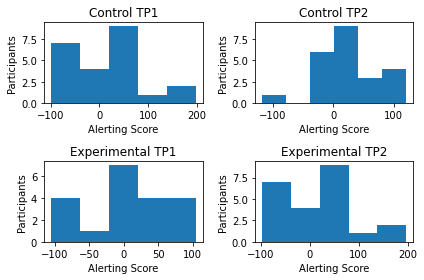

In [4]:
# plotting alerting scores Histograms
alerting_con_TP1 = ANT_NO_C_con_TP1 - ANT_MID_C_con_TP1
alerting_con_TP2 = ANT_NO_C_con_TP2 - ANT_MID_C_con_TP2
alerting_exp_TP1 = ANT_NO_C_exp_TP1 - ANT_MID_C_exp_TP1
alerting_exp_TP2 = ANT_NO_C_exp_TP2 - ANT_MID_C_exp_TP2

f, axs = plt.subplots(nrows=2, ncols=2)
axs[0,0].hist(alerting_con_TP1, bins = 5)
axs[0,0].set_title('Control TP1')
axs[0,0].set_xlabel('Alerting Score')
axs[0,0].set_ylabel('Participants')

axs[0,1].hist(alerting_con_TP2, bins = 6)
axs[0,1].set_title('Control TP2')
axs[0,1].set_xlabel('Alerting Score')
axs[0,1].set_ylabel('Participants')

axs[1,0].hist(alerting_exp_TP1, bins = 5)
axs[1,0].set_title('Experimental TP1')
axs[1,0].set_xlabel('Alerting Score')
axs[1,0].set_ylabel('Participants')

axs[1,1].hist(alerting_con_TP1, bins = 5)
axs[1,1].set_title('Experimental TP2')
axs[1,1].set_xlabel('Alerting Score')
axs[1,1].set_ylabel('Participants')

f.tight_layout()


In [5]:
import scipy.stats as stats

MAAS_dDATA = {'MAAS_con_TP1':MAAS_con_TP1,'MAAS_con_TP2':MAAS_con_TP2,'MAAS_exp_TP1':MAAS_exp_TP1, 'MAAS_exp_TP2':MAAS_exp_TP2} 
                  

ANT_dDATA ={'ANT_NO_C_con_TP1':ANT_NO_C_con_TP1, 'ANT_NO_C_con_TP2':ANT_NO_C_con_TP2, 'ANT_NO_I_con_TP1': ANT_NO_I_con_TP1,'ANT_NO_I_con_TP2':ANT_NO_I_con_TP2, 
            'ANT_NO_C_exp_TP1':ANT_NO_C_exp_TP1, 'ANT_NO_C_exp_TP2':ANT_NO_C_exp_TP2, 'ANT_NO_I_exp_TP1': ANT_NO_I_exp_TP1,'ANT_NO_I_exp_TP2':ANT_NO_I_exp_TP2,
            'ANT_MID_C_con_TP1':ANT_MID_C_con_TP1, 'ANT_MID_C_con_TP2':ANT_MID_C_con_TP2, 'ANT_MID_I_con_TP1':ANT_MID_I_con_TP1, 'ANT_MID_I_con_TP2':ANT_MID_I_con_TP2,
            'ANT_MID_C_exp_TP1':ANT_MID_C_exp_TP1, 'ANT_MID_C_exp_TP2':ANT_MID_C_exp_TP2, 'ANT_MID_I_exp_TP1':ANT_MID_I_exp_TP1, 'ANT_MID_I_exp_TP2':ANT_MID_I_exp_TP2,
            'ANT_SPATIAL_C_con_TP1':ANT_SPATIAL_C_con_TP1, 'ANT_SPATIAL_C_con_TP2':ANT_SPATIAL_C_con_TP2, 'ANT_SPATIAL_I_con_TP1':ANT_SPATIAL_I_con_TP1, 'ANT_SPATIAL_I_con_TP2':ANT_SPATIAL_I_con_TP2,
            'ANT_SPATIAL_C_exp_TP1':ANT_SPATIAL_C_exp_TP1, 'ANT_SPATIAL_C_exp_TP2':ANT_SPATIAL_C_exp_TP2, 'ANT_SPATIAL_I_exp_TP1':ANT_SPATIAL_I_exp_TP1, 'ANT_SPATIAL_I_exp_TP2':ANT_SPATIAL_I_exp_TP2}

alerting_effect_dData = {'Alerting_con_TP1':alerting_con_TP1, 'Alerting_con_TP2':alerting_con_TP2 ,'Alerting_exp_TP1':alerting_exp_TP1,'Alerting_exp_TP2': alerting_exp_TP2}


#### Test for outliers ####

#Tests for normality alerting effect Data
print("The Data is normally distributed if p>0.05:")
for key, val in alerting_effect_dData.items():
    stat, p = stats.shapiro(val)
    if p<0.05:
        print(key,"is NOT normally distributed (p=%.3f)"%p)
    else:
        print(key,"is normally distributed (p=%.3f)"%p)

#Tests for normality MAAS Data
print("The Data is normally distributed if p>0.05:")
for key, val in MAAS_dDATA.items():
    stat, p = stats.shapiro(val)
    if p<0.05:
        print(key,"is NOT normally distributed (p=%.3f)"%p)
    else:
        print(key,"is normally distributed (p=%.3f)"%p)

#Tests for normality ANT Data 
for key, val in ANT_dDATA.items():
    stat, p = stats.shapiro(val)
    if p<0.05:
        print(key,"is NOT normally distributed (p=%.3f)"%p)
    else:
        print(key,"is normally distributed (p=%.3f)"%p)
        
        
#MAAS_dDATA

The Data is normally distributed if p>0.05:
Alerting_con_TP1 is normally distributed (p=0.283)
Alerting_con_TP2 is normally distributed (p=0.237)
Alerting_exp_TP1 is normally distributed (p=0.337)
Alerting_exp_TP2 is normally distributed (p=0.131)
The Data is normally distributed if p>0.05:
MAAS_con_TP1 is normally distributed (p=0.784)
MAAS_con_TP2 is normally distributed (p=1.000)
MAAS_exp_TP1 is normally distributed (p=0.896)
MAAS_exp_TP2 is normally distributed (p=0.900)
ANT_NO_C_con_TP1 is normally distributed (p=0.526)
ANT_NO_C_con_TP2 is normally distributed (p=0.663)
ANT_NO_I_con_TP1 is normally distributed (p=0.847)
ANT_NO_I_con_TP2 is NOT normally distributed (p=0.036)
ANT_NO_C_exp_TP1 is normally distributed (p=0.212)
ANT_NO_C_exp_TP2 is NOT normally distributed (p=0.038)
ANT_NO_I_exp_TP1 is normally distributed (p=0.062)
ANT_NO_I_exp_TP2 is NOT normally distributed (p=0.041)
ANT_MID_C_con_TP1 is normally distributed (p=0.813)
ANT_MID_C_con_TP2 is NOT normally distributed (p

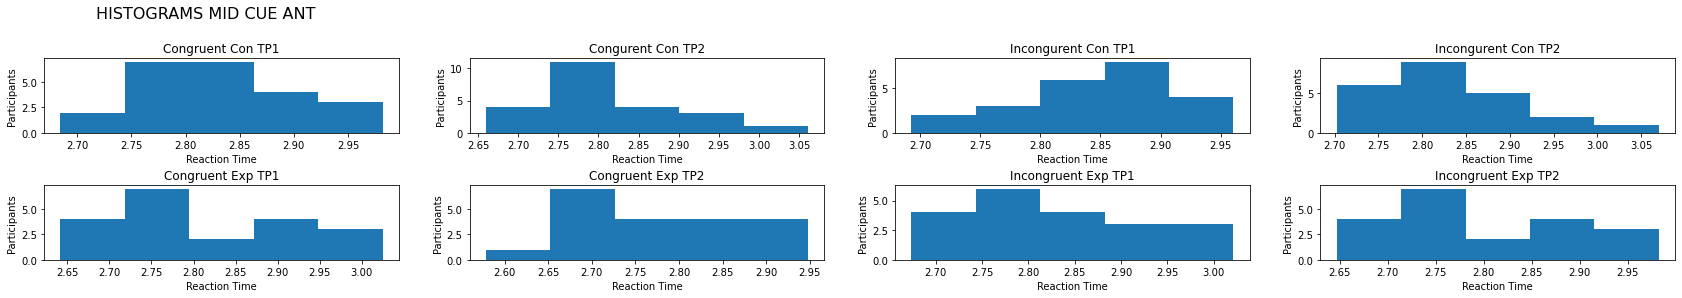

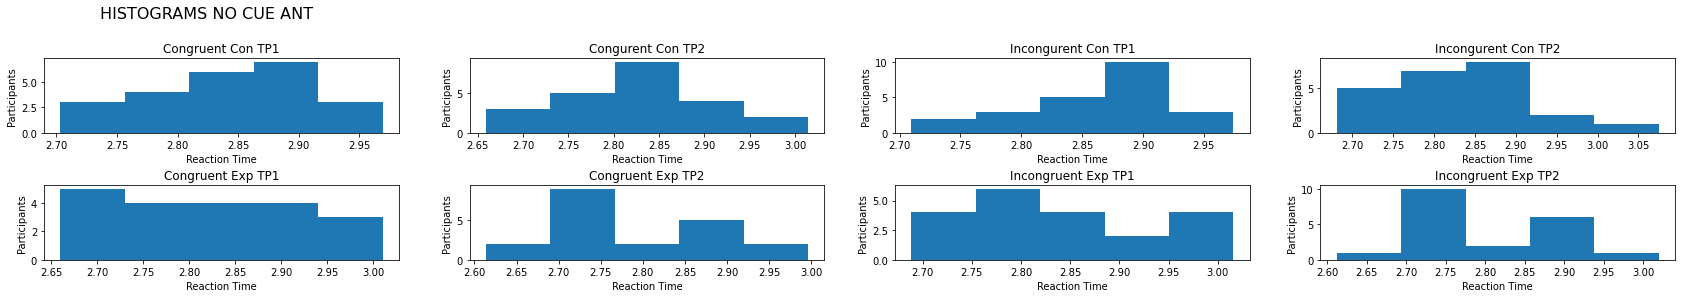

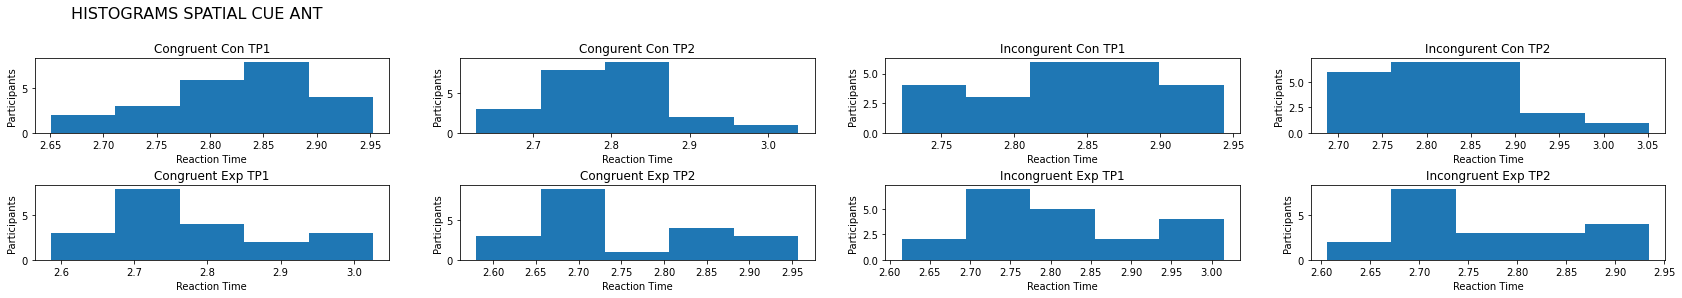

In [6]:
#As ANT scores (Reaction Times) are not normally distributed (positively skewed), data need to be transformed
# Transforming ANT scores data with log function (log10(x))
ANT_dDATA_transformed = {key:np.log10(val) for (key,val) in ANT_dDATA.items()} 

f1, axs1 = plt.subplots(nrows=2, ncols=4)
f1.suptitle('HISTOGRAMS MID CUE ANT', fontsize=16)

axs1[0,0].hist(ANT_dDATA_transformed['ANT_MID_C_con_TP1'], bins = 5)
axs1[0,0].set_title('Congruent Con TP1')
axs1[0,0].set_xlabel('Reaction Time')
axs1[0,0].set_ylabel('Participants')

axs1[0,1].hist(ANT_dDATA_transformed['ANT_MID_C_con_TP2'], bins = 5)
axs1[0,1].set_title('Congurent Con TP2')
axs1[0,1].set_xlabel('Reaction Time')
axs1[0,1].set_ylabel('Participants')

axs1[0,2].hist(ANT_dDATA_transformed['ANT_MID_I_con_TP1'], bins = 5)
axs1[0,2].set_title('Incongurent Con TP1')
axs1[0,2].set_xlabel('Reaction Time')
axs1[0,2].set_ylabel('Participants')

axs1[0,3].hist(ANT_dDATA_transformed['ANT_MID_I_con_TP2'], bins = 5)
axs1[0,3].set_title('Incongurent Con TP2')
axs1[0,3].set_xlabel('Reaction Time')
axs1[0,3].set_ylabel('Participants')

axs1[1,0].hist(ANT_dDATA_transformed['ANT_MID_C_exp_TP1'], bins = 5)
axs1[1,0].set_title('Congruent Exp TP1')
axs1[1,0].set_xlabel('Reaction Time')
axs1[1,0].set_ylabel('Participants')

axs1[1,1].hist(ANT_dDATA_transformed['ANT_MID_C_exp_TP2'], bins = 5)
axs1[1,1].set_title('Congruent Exp TP2')
axs1[1,1].set_xlabel('Reaction Time')
axs1[1,1].set_ylabel('Participants')

axs1[1,2].hist(ANT_dDATA_transformed['ANT_MID_I_exp_TP1'], bins = 5)
axs1[1,2].set_title('Incongruent Exp TP1')
axs1[1,2].set_xlabel('Reaction Time')
axs1[1,2].set_ylabel('Participants')

axs1[1,3].hist(ANT_dDATA_transformed['ANT_MID_I_exp_TP2'], bins = 5)
axs1[1,3].set_title('Incongruent Exp TP2')
axs1[1,3].set_xlabel('Reaction Time')
axs1[1,3].set_ylabel('Participants')

f1.subplots_adjust(left=0.125, right=3.9, bottom=0.1, top=0.8, wspace=0.2, hspace=0.7)

f2, axs2 = plt.subplots(nrows=2, ncols=4)
f2.suptitle('HISTOGRAMS NO CUE ANT', fontsize=16)

axs2[0,0].hist(ANT_dDATA_transformed['ANT_NO_C_con_TP1'], bins = 5)
axs2[0,0].set_title('Congruent Con TP1')
axs2[0,0].set_xlabel('Reaction Time')
axs2[0,0].set_ylabel('Participants')

axs2[0,1].hist(ANT_dDATA_transformed['ANT_NO_C_con_TP2'], bins = 5)
axs2[0,1].set_title('Congurent Con TP2')
axs2[0,1].set_xlabel('Reaction Time')
axs2[0,1].set_ylabel('Participants')

axs2[0,2].hist(ANT_dDATA_transformed['ANT_NO_I_con_TP1'], bins = 5)
axs2[0,2].set_title('Incongurent Con TP1')
axs2[0,2].set_xlabel('Reaction Time')
axs2[0,2].set_ylabel('Participants')

axs2[0,3].hist(ANT_dDATA_transformed['ANT_NO_I_con_TP2'], bins = 5)
axs2[0,3].set_title('Incongurent Con TP2')
axs2[0,3].set_xlabel('Reaction Time')
axs2[0,3].set_ylabel('Participants')

axs2[1,0].hist(ANT_dDATA_transformed['ANT_NO_C_exp_TP1'], bins = 5)
axs2[1,0].set_title('Congruent Exp TP1')
axs2[1,0].set_xlabel('Reaction Time')
axs2[1,0].set_ylabel('Participants')

axs2[1,1].hist(ANT_dDATA_transformed['ANT_NO_C_exp_TP2'], bins = 5)
axs2[1,1].set_title('Congruent Exp TP2')
axs2[1,1].set_xlabel('Reaction Time')
axs2[1,1].set_ylabel('Participants')

axs2[1,2].hist(ANT_dDATA_transformed['ANT_NO_I_exp_TP1'], bins = 5)
axs2[1,2].set_title('Incongruent Exp TP1')
axs2[1,2].set_xlabel('Reaction Time')
axs2[1,2].set_ylabel('Participants')

axs2[1,3].hist(ANT_dDATA_transformed['ANT_NO_I_exp_TP2'], bins = 5)
axs2[1,3].set_title('Incongruent Exp TP2')
axs2[1,3].set_xlabel('Reaction Time')
axs2[1,3].set_ylabel('Participants')

f2.subplots_adjust(left=0.125, right=3.9, bottom=0.1, top=0.8, wspace=0.2, hspace=0.7)

f3, axs3 = plt.subplots(nrows=2, ncols=4)
f3.suptitle('HISTOGRAMS SPATIAL CUE ANT', fontsize=16)

axs3[0,0].hist(ANT_dDATA_transformed['ANT_SPATIAL_C_con_TP1'], bins = 5)
axs3[0,0].set_title('Congruent Con TP1')
axs3[0,0].set_xlabel('Reaction Time')
axs3[0,0].set_ylabel('Participants')

axs3[0,1].hist(ANT_dDATA_transformed['ANT_SPATIAL_C_con_TP2'], bins = 5)
axs3[0,1].set_title('Congurent Con TP2')
axs3[0,1].set_xlabel('Reaction Time')
axs3[0,1].set_ylabel('Participants')

axs3[0,2].hist(ANT_dDATA_transformed['ANT_SPATIAL_I_con_TP1'], bins = 5)
axs3[0,2].set_title('Incongurent Con TP1')
axs3[0,2].set_xlabel('Reaction Time')
axs3[0,2].set_ylabel('Participants')

axs3[0,3].hist(ANT_dDATA_transformed['ANT_SPATIAL_I_con_TP2'], bins = 5)
axs3[0,3].set_title('Incongurent Con TP2')
axs3[0,3].set_xlabel('Reaction Time')
axs3[0,3].set_ylabel('Participants')

axs3[1,0].hist(ANT_dDATA_transformed['ANT_SPATIAL_C_exp_TP1'], bins = 5)
axs3[1,0].set_title('Congruent Exp TP1')
axs3[1,0].set_xlabel('Reaction Time')
axs3[1,0].set_ylabel('Participants')

axs3[1,1].hist(ANT_dDATA_transformed['ANT_SPATIAL_C_exp_TP2'], bins = 5)
axs3[1,1].set_title('Congruent Exp TP2')
axs3[1,1].set_xlabel('Reaction Time')
axs3[1,1].set_ylabel('Participants')

axs3[1,2].hist(ANT_dDATA_transformed['ANT_SPATIAL_I_exp_TP1'], bins = 5)
axs3[1,2].set_title('Incongruent Exp TP1')
axs3[1,2].set_xlabel('Reaction Time')
axs3[1,2].set_ylabel('Participants')

axs3[1,3].hist(ANT_dDATA_transformed['ANT_SPATIAL_I_exp_TP2'], bins = 5)
axs3[1,3].set_title('Incongruent Exp TP2')
axs3[1,3].set_xlabel('Reaction Time')
axs3[1,3].set_ylabel('Participants')

f3.subplots_adjust(left=0.125, right=3.9, bottom=0.1, top=0.8, wspace=0.2, hspace=0.7)


In [7]:
#ANT_dDATA_transformed['ANT_MID_C_con_TP2']
print("The Data is normally distributed if p>0.05:")
#Tests for normality ANT Data 

for key, val in ANT_dDATA_transformed.items():
    stat, p = stats.shapiro(val)
    if p<0.05:
        print(key,"is NOT normally distributed (p=%.3f)"%p)
    else:
        print(key,"is normally distributed (p=%.3f)"%p)

The Data is normally distributed if p>0.05:
ANT_NO_C_con_TP1 is normally distributed (p=0.621)
ANT_NO_C_con_TP2 is normally distributed (p=0.999)
ANT_NO_I_con_TP1 is normally distributed (p=0.385)
ANT_NO_I_con_TP2 is normally distributed (p=0.750)
ANT_NO_C_exp_TP1 is normally distributed (p=0.433)
ANT_NO_C_exp_TP2 is normally distributed (p=0.111)
ANT_NO_I_exp_TP1 is normally distributed (p=0.292)
ANT_NO_I_exp_TP2 is normally distributed (p=0.228)
ANT_MID_C_con_TP1 is normally distributed (p=0.934)
ANT_MID_C_con_TP2 is normally distributed (p=0.187)
ANT_MID_I_con_TP1 is normally distributed (p=0.342)
ANT_MID_I_con_TP2 is normally distributed (p=0.259)
ANT_MID_C_exp_TP1 is normally distributed (p=0.529)
ANT_MID_C_exp_TP2 is normally distributed (p=0.142)
ANT_MID_I_exp_TP1 is normally distributed (p=0.374)
ANT_MID_I_exp_TP2 is normally distributed (p=0.075)
ANT_SPATIAL_C_con_TP1 is normally distributed (p=0.314)
ANT_SPATIAL_C_con_TP2 is normally distributed (p=0.851)
ANT_SPATIAL_I_con_TP

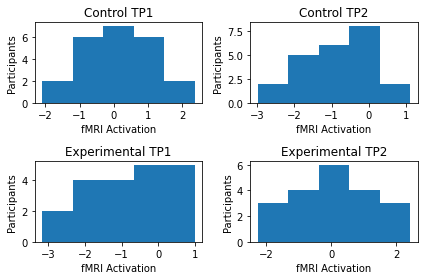

In [8]:
#plotting histograms of fMRI_mid_cingulate Activations in the alerting condition 
fMRI_con_TP1 = np.array(fMRI_Data_con.loc[fMRI_Data_con['TP'] == '1']['fMRI_signal'])
fMRI_con_TP2 = np.array(fMRI_Data_con.loc[fMRI_Data_con['TP'] == '2']['fMRI_signal'])
fMRI_exp_TP1 = np.array(fMRI_Data_exp.loc[fMRI_Data_con['TP'] == '1']['fMRI_signal'])
fMRI_exp_TP2 = np.array(fMRI_Data_exp.loc[fMRI_Data_con['TP'] == '2']['fMRI_signal'])


f, axs = plt.subplots(nrows=2, ncols=2)
axs[0,0].hist(fMRI_con_TP1, bins = 5)
axs[0,0].set_title('Control TP1')
axs[0,0].set_xlabel('fMRI Activation')
axs[0,0].set_ylabel('Participants')

axs[0,1].hist(fMRI_con_TP2, bins = 5)
axs[0,1].set_title('Control TP2')
axs[0,1].set_xlabel('fMRI Activation')
axs[0,1].set_ylabel('Participants')

axs[1,0].hist(fMRI_exp_TP1, bins = 5)
axs[1,0].set_title('Experimental TP1')
axs[1,0].set_xlabel('fMRI Activation')
axs[1,0].set_ylabel('Participants')

axs[1,1].hist(fMRI_exp_TP2, bins = 5)
axs[1,1].set_title('Experimental TP2')
axs[1,1].set_xlabel('fMRI Activation')
axs[1,1].set_ylabel('Participants')

f.tight_layout()
#fMRI_Data_exp
#fMRI_Data_con
#fMRI_con_TP1
#fMRI_exp_TP2
#fMRI_exp_TP1

In [9]:
#fMRI Data Normality Test
fMRI_dDATA = {'fMRI_con_TP1':fMRI_con_TP1,'fMRI_con_TP2':fMRI_con_TP2,'fMRI_exp_TP1':fMRI_exp_TP1, 'fMRI_exp_TP2':fMRI_exp_TP2} 

print("The Data is normally distributed if p>0.05:")
for key, val in fMRI_dDATA.items():
    stat, p = stats.shapiro(val)
    if p<0.05:
        print(key,"is NOT normally distributed (p=%.3f)"%p)
    else:
        print(key,"is normally distributed (p=%.3f)"%p)


The Data is normally distributed if p>0.05:
fMRI_con_TP1 is normally distributed (p=0.854)
fMRI_con_TP2 is normally distributed (p=0.356)
fMRI_exp_TP1 is normally distributed (p=0.268)
fMRI_exp_TP2 is normally distributed (p=0.999)


### Plotting Correlations

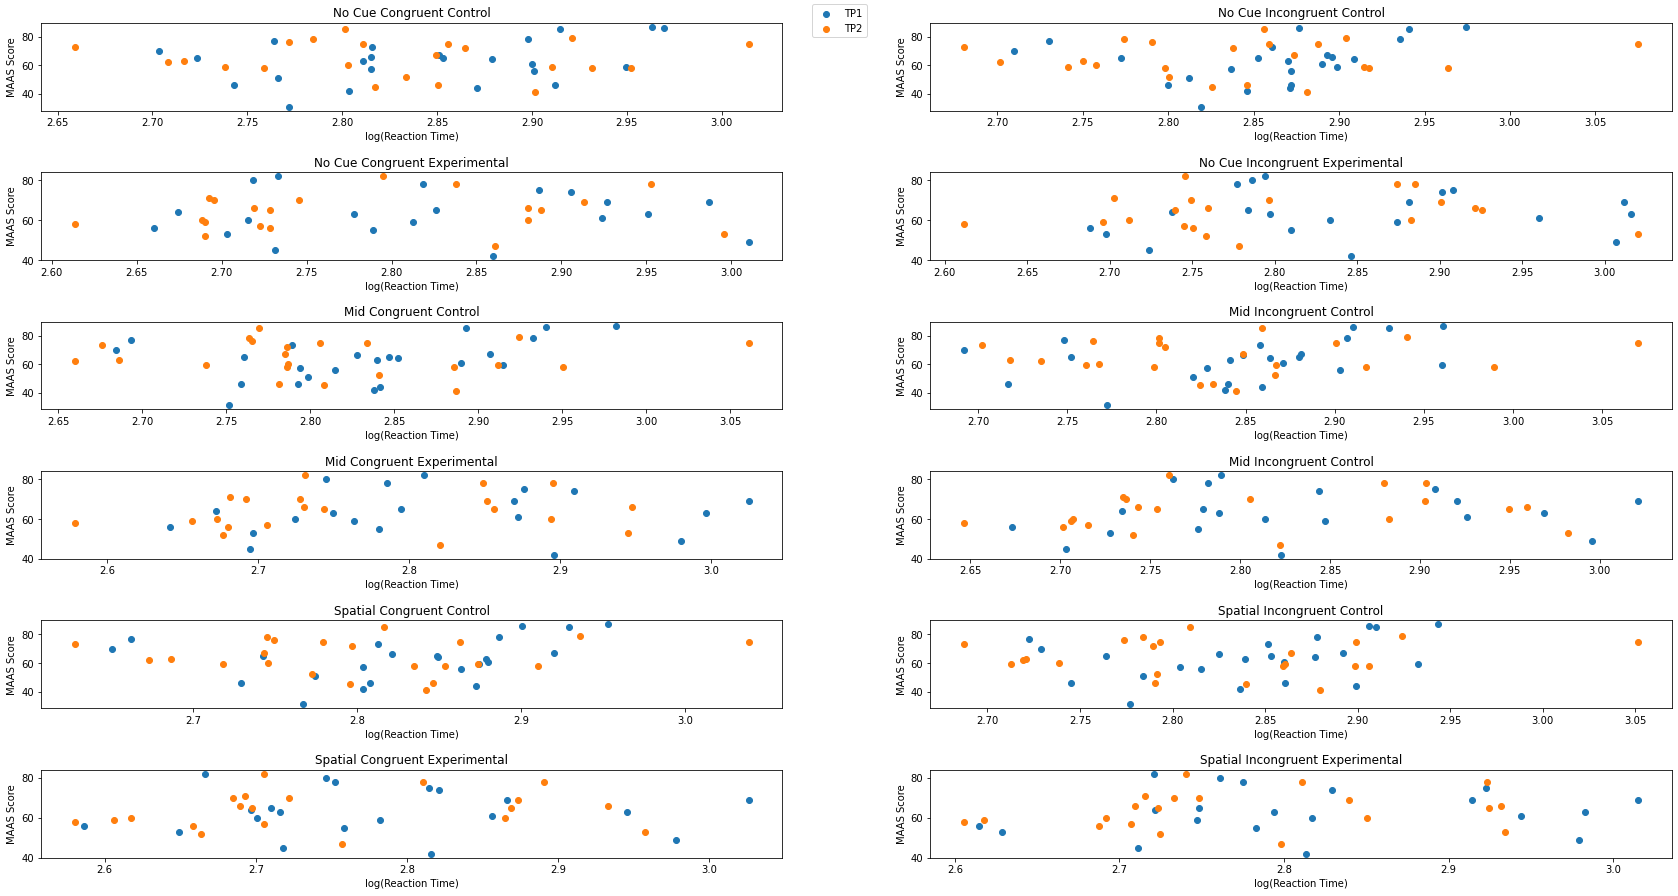

In [10]:
# first way of plotting analysis results to see if there is any correlation (using data in dictionaries)

f4, axs4 = plt.subplots(nrows=6, ncols=2)
#f4.suptitle('Scatter Plots between MAAS score and the ANT reaction times',ha='center', va='bottom', size=16)

axs4[0,0].scatter(ANT_dDATA_transformed['ANT_NO_C_con_TP1'],MAAS_con_TP1)
axs4[0,0].scatter(ANT_dDATA_transformed['ANT_NO_C_con_TP2'],MAAS_con_TP2)
axs4[0,0].set_title('No Cue Congruent Control')
axs4[0,0].set_xlabel('log(Reaction Time)')
axs4[0,0].set_ylabel('MAAS Score')

axs4[0,1].scatter(ANT_dDATA_transformed['ANT_NO_I_con_TP1'],MAAS_con_TP1)
axs4[0,1].scatter(ANT_dDATA_transformed['ANT_NO_I_con_TP2'],MAAS_con_TP2)
axs4[0,1].set_title('No Cue Incongruent Control')
axs4[0,1].set_xlabel('log(Reaction Time)')
axs4[0,1].set_ylabel('MAAS Score')

axs4[1,0].scatter(ANT_dDATA_transformed['ANT_NO_C_exp_TP1'],MAAS_exp_TP1)
axs4[1,0].scatter(ANT_dDATA_transformed['ANT_NO_C_exp_TP2'],MAAS_exp_TP2)
axs4[1,0].set_title('No Cue Congruent Experimental')
axs4[1,0].set_xlabel('log(Reaction Time)')
axs4[1,0].set_ylabel('MAAS Score')

axs4[1,1].scatter(ANT_dDATA_transformed['ANT_NO_I_exp_TP1'],MAAS_exp_TP1)
axs4[1,1].scatter(ANT_dDATA_transformed['ANT_NO_I_exp_TP2'],MAAS_exp_TP2)
axs4[1,1].set_title('No Cue Incongruent Experimental')
axs4[1,1].set_xlabel('log(Reaction Time)')
axs4[1,1].set_ylabel('MAAS Score')

axs4[2,0].scatter(ANT_dDATA_transformed['ANT_MID_C_con_TP1'],MAAS_con_TP1)
axs4[2,0].scatter(ANT_dDATA_transformed['ANT_MID_C_con_TP2'],MAAS_con_TP2)
axs4[2,0].set_title('Mid Congruent Control')
axs4[2,0].set_xlabel('log(Reaction Time)')
axs4[2,0].set_ylabel('MAAS Score')

axs4[2,1].scatter(ANT_dDATA_transformed['ANT_MID_I_con_TP1'],MAAS_con_TP1)
axs4[2,1].scatter(ANT_dDATA_transformed['ANT_MID_I_con_TP2'],MAAS_con_TP2)
axs4[2,1].set_title('Mid Incongruent Control')
axs4[2,1].set_xlabel('log(Reaction Time)')
axs4[2,1].set_ylabel('MAAS Score')

axs4[3,0].scatter(ANT_dDATA_transformed['ANT_MID_C_exp_TP1'],MAAS_exp_TP1)
axs4[3,0].scatter(ANT_dDATA_transformed['ANT_MID_C_exp_TP2'],MAAS_exp_TP2)
axs4[3,0].set_title('Mid Congruent Experimental')
axs4[3,0].set_xlabel('log(Reaction Time)')
axs4[3,0].set_ylabel('MAAS Score')

axs4[3,1].scatter(ANT_dDATA_transformed['ANT_MID_I_exp_TP1'],MAAS_exp_TP1)
axs4[3,1].scatter(ANT_dDATA_transformed['ANT_MID_I_exp_TP2'],MAAS_exp_TP2)
axs4[3,1].set_title('Mid Incongruent Control')
axs4[3,1].set_xlabel('log(Reaction Time)')
axs4[3,1].set_ylabel('MAAS Score')

axs4[4,0].scatter(ANT_dDATA_transformed['ANT_SPATIAL_C_con_TP1'],MAAS_con_TP1)
axs4[4,0].scatter(ANT_dDATA_transformed['ANT_SPATIAL_C_con_TP2'],MAAS_con_TP2)
axs4[4,0].set_title('Spatial Congruent Control')
axs4[4,0].set_xlabel('log(Reaction Time)')
axs4[4,0].set_ylabel('MAAS Score')

axs4[4,1].scatter(ANT_dDATA_transformed['ANT_SPATIAL_I_con_TP1'],MAAS_con_TP1)
axs4[4,1].scatter(ANT_dDATA_transformed['ANT_SPATIAL_I_con_TP2'],MAAS_con_TP2)
axs4[4,1].set_title('Spatial Incongruent Control')
axs4[4,1].set_xlabel('log(Reaction Time)')
axs4[4,1].set_ylabel('MAAS Score')

axs4[5,0].scatter(ANT_dDATA_transformed['ANT_SPATIAL_C_exp_TP1'],MAAS_exp_TP1)
axs4[5,0].scatter(ANT_dDATA_transformed['ANT_SPATIAL_C_exp_TP2'],MAAS_exp_TP2)
axs4[5,0].set_title('Spatial Congruent Experimental')
axs4[5,0].set_xlabel('log(Reaction Time)')
axs4[5,0].set_ylabel('MAAS Score')

axs4[5,1].scatter(ANT_dDATA_transformed['ANT_SPATIAL_I_exp_TP1'],MAAS_exp_TP1, label ='TP1')
axs4[5,1].scatter(ANT_dDATA_transformed['ANT_SPATIAL_I_exp_TP2'],MAAS_exp_TP2, label = 'TP2')
axs4[5,1].set_title('Spatial Incongruent Experimental')
axs4[5,1].set_xlabel('log(Reaction Time)')
axs4[5,1].set_ylabel('MAAS Score')
f4.legend(loc = 'upper center')


f4.subplots_adjust(left=0.125, right=3.9, bottom=0.1, top=3.0, wspace=0.2, hspace=0.7)

#MAAS_con_TP2

In [11]:
##convert dictionaries into data frame and use scatter corr function from data frame##

#arrange all control results (ANT and MAAS) into one data frame by subject
df_alerting_con = pd.DataFrame({key:alerting_effect_dData[key] for key in list(alerting_effect_dData.keys())[:2]})
df_MAAS_con = pd.DataFrame({key:MAAS_dDATA[key] for key in list(MAAS_dDATA.keys())[:2]})
df_ANT_con = pd.DataFrame({key:ANT_dDATA_transformed[key] for key in list(ANT_dDATA_transformed.keys())[:4] + list(ANT_dDATA_transformed.keys())[8:12]+ 
                       list(ANT_dDATA_transformed.keys())[16:20] + list(ANT_dDATA_transformed.keys())[24:28] })

df_MAAS_con['subject'] = MAAS_Data['id'][:23]
df_ANT_con['subject'] = subjects_ANT['id'][:23]
df_alerting_con['subject'] = subjects_ANT['id'][:23]

df_ANT_MAAS_con =df_MAAS_con.append(df_ANT_con)
df_ANT_MAAS_con = df_ANT_MAAS_con.groupby('subject').sum().reset_index()
print(np.where(df_ANT_MAAS_con['MAAS_con_TP2'] == 0))

df_ANT_MAAS_con = df_ANT_MAAS_con.append(df_alerting_con)
df_ANT_MAAS_con = df_ANT_MAAS_con.groupby('subject').sum().reset_index()

df_ANT_MAAS_con['fMRI_TP1'] = fMRI_con_TP1
df_ANT_MAAS_con['fMRI_TP2'] = fMRI_con_TP2

df_ANT_MAAS_con['MAAS_con_TP2'][12] = np.nan

df_ANT_MAAS_con.to_excel('/Users/mariamora/Documents/PhD/Courses/3rd_Year/Python/Final_project/ANT_MAAS_Subjects_con.xlsx')

df_ANT_MAAS_con



(array([12]),)


<ipython-input-11-a7e081f336b4>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ANT_MAAS_con['MAAS_con_TP2'][12] = np.nan


,subject,MAAS_con_TP1,MAAS_con_TP2,ANT_NO_C_con_TP1,ANT_NO_C_con_TP2,ANT_NO_I_con_TP1,ANT_NO_I_con_TP2,ANT_MID_C_con_TP1,ANT_MID_C_con_TP2,ANT_MID_I_con_TP1,ANT_MID_I_con_TP2,ANT_SPATIAL_C_con_TP1,ANT_SPATIAL_C_con_TP2,ANT_SPATIAL_I_con_TP1,ANT_SPATIAL_I_con_TP2,Alerting_con_TP1,Alerting_con_TP2,fMRI_TP1,fMRI_TP2
0,conABaKa89,59.0,59.0,2.949333,2.910789,2.898762,2.914489,2.914735,2.911646,2.960142,2.867168,2.874124,2.873587,2.932816,2.860583,68.141667,-1.608333,-0.9479,-0.8840
1,conABaNi91,85.0,72.0,2.914757,2.864442,2.940749,2.837625,2.892642,2.786130,2.930321,2.804616,2.929270,2.797048,2.910144,2.789686,40.800000,120.758333,-0.3229,-2.1138
2,conABrOl79,66.0,76.0,2.815146,2.771710,2.895653,2.790373,2.827934,2.765526,2.848584,2.764450,2.821230,2.749176,2.824917,2.773604,-19.525000,8.358333,0.1404,-1.3383
3,conAHoDi71,67.0,79.0,2.850958,2.921084,2.893151,2.904016,2.907228,2.924266,2.881309,2.940770,2.920045,2.935633,2.892090,2.924133,-98.149242,-6.133333,-2.0958,-2.9853
4,conAKoMa88,70.0,63.0,2.703198,2.716560,2.709503,2.750219,2.684434,2.686219,2.692245,2.718142,2.650639,2.686666,2.728712,2.720848,21.350000,35.133333,-0.3670,-1.8146
5,conAKoSe98,51.0,59.0,2.765917,2.738034,2.812323,2.741506,2.798507,2.738067,2.820388,2.760724,2.774073,2.718301,2.784052,2.712699,-45.458333,-0.041667,2.3582,-0.1510
6,conAPiCh69,61.0,58.0,2.899898,2.952300,2.889885,2.963504,2.889516,2.950353,2.870765,2.917597,2.879841,2.910340,2.860378,2.906016,18.758333,4.008333,-0.6220,-2.1888
7,conAPoAr64,56.0,58.0,2.901231,2.758861,2.871660,2.798356,2.814952,2.786063,2.902950,2.798699,2.863571,2.834760,2.815179,2.859475,143.525000,-37.096667,-0.4918,-0.2512
8,conASpCh59,78.0,75.0,2.897700,2.855711,2.935528,2.859128,2.932694,2.833625,2.906730,2.900517,2.886655,2.862863,2.877865,2.898849,-66.300000,35.566667,0.3503,-0.8339
9,conATsTr93,46.0,46.0,2.743229,2.850580,2.799668,2.845981,2.758798,2.781564,2.717046,2.831635,2.728935,2.846141,2.745185,2.790402,-20.208333,104.158333,-0.0151,-0.2777


In [12]:
#arrange all experimental results (ANT and MAAS) into one data frame by subject
df_alerting_exp = pd.DataFrame({key:alerting_effect_dData[key] for key in list(alerting_effect_dData.keys())[2:4]})
df_MAAS_exp = pd.DataFrame({key:MAAS_dDATA[key] for key in list(MAAS_dDATA.keys())[2:4]})
df_ANT_exp = pd.DataFrame({key:ANT_dDATA_transformed[key] for key in list(ANT_dDATA_transformed.keys())[4:8] + list(ANT_dDATA_transformed.keys())[12:16]+ 
                       list(ANT_dDATA_transformed.keys())[20:24] + list(ANT_dDATA_transformed.keys())[28:] })

df_MAAS_exp['subject']=list(MAAS_Data['id'][23:43])
df_ANT_exp['subject'] = list(subjects_ANT['id'][23:43])
df_alerting_exp['subject'] =list(subjects_ANT['id'][23:43])

df_ANT_MAAS_exp =df_MAAS_exp.append(df_ANT_exp)
df_ANT_MAAS_exp = df_ANT_MAAS_exp.groupby('subject').sum().reset_index()

df_ANT_MAAS_exp = df_ANT_MAAS_exp.append(df_alerting_exp)
df_ANT_MAAS_exp = df_ANT_MAAS_exp.groupby('subject').sum().reset_index()

df_ANT_MAAS_exp['fMRI_TP1'] = fMRI_exp_TP1
df_ANT_MAAS_exp['fMRI_TP2'] = fMRI_exp_TP2

df_ANT_MAAS_exp.to_excel('/Users/mariamora/Documents/PhD/Courses/3rd_Year/Python/Final_project/ANT_MAAS_Subjects_exp.xlsx')

df_ANT_MAAS_exp


,subject,MAAS_exp_TP1,MAAS_exp_TP2,ANT_NO_C_exp_TP1,ANT_NO_C_exp_TP2,ANT_NO_I_exp_TP1,ANT_NO_I_exp_TP2,ANT_MID_C_exp_TP1,ANT_MID_C_exp_TP2,ANT_MID_I_exp_TP1,ANT_MID_I_exp_TP2,ANT_SPATIAL_C_exp_TP1,ANT_SPATIAL_C_exp_TP2,ANT_SPATIAL_I_exp_TP1,ANT_SPATIAL_I_exp_TP2,Alerting_exp_TP1,Alerting_exp_TP2,fMRI_TP1,fMRI_TP2
0,expABeCo96,59.0,57.0,2.812418,2.722559,2.874206,2.745114,2.763696,2.705778,2.847084,2.715153,2.782389,2.705486,2.747418,2.707002,68.900000,20.008333,-0.4331,-1.3512
1,expAChAn75,49.0,53.0,3.010208,2.996048,3.006865,3.020102,2.980000,2.945132,2.995756,2.982267,2.977826,2.957228,2.979256,2.934511,68.791666,109.625000,-1.6980,-2.2651
2,expADuAl92,60.0,70.0,2.715523,2.695460,2.833699,2.796569,2.724665,2.692105,2.813953,2.805456,2.700790,2.684800,2.817158,2.733264,-11.050000,3.816667,-0.0027,-0.0176
3,expAKaCh83,82.0,66.0,2.732936,2.719255,2.794116,2.759473,2.810126,2.730392,2.789216,2.743327,2.666432,2.689523,2.720793,2.709496,-105.166667,-13.608333,0.9824,-0.4550
4,expAKeJo83,42.0,47.0,2.859589,2.860947,2.845966,2.778537,2.896076,2.820781,2.822511,2.822293,2.815888,2.756839,2.813125,2.798490,-63.433333,64.133333,-0.8533,2.4161
5,expALeMa78,64.0,60.0,2.674532,2.688212,2.737676,2.711892,2.671890,2.672429,2.734546,2.706974,2.696953,2.617193,2.721831,2.692083,2.866667,17.408333,-1.1186,-1.0542
6,expAMaIn73,69.0,65.0,2.987227,2.887997,3.011341,2.925621,3.024971,2.856180,3.021385,2.949514,3.026056,2.868870,3.015140,2.924383,-88.166666,54.583333,-3.1582,1.0359
7,expARiVi71,75.0,78.0,2.886815,2.952533,2.907765,2.885088,2.876423,2.895091,2.908454,2.903673,2.814569,2.890659,2.922937,2.923058,18.220455,111.063636,-2.0734,-0.6380
8,expARoeMa94,56.0,58.0,2.660098,2.613401,2.688309,2.611768,2.641524,2.578372,2.673382,2.646526,2.586231,2.580145,2.614862,2.605691,19.141667,31.816667,0.7196,-0.0324
9,expAStLe96,65.0,82.0,2.826021,2.794796,2.783975,2.745498,2.794819,2.731098,2.779476,2.760328,2.710265,2.705115,2.748194,2.740600,46.441667,85.050000,-2.2975,1.6949


/Users/mariamora/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<AxesSubplot:xlabel='MAAS_exp_TP2', ylabel='ANT_SPATIAL_I_exp_TP2'>

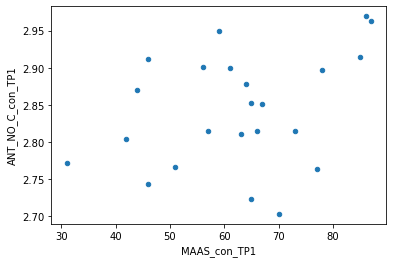

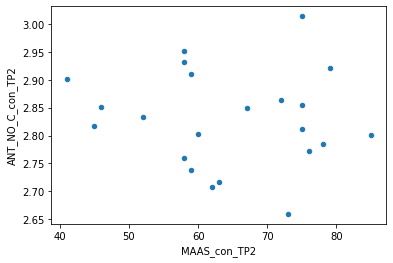

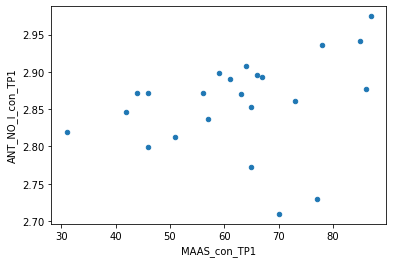

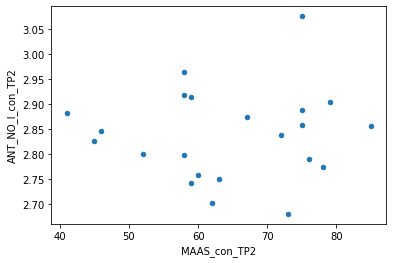

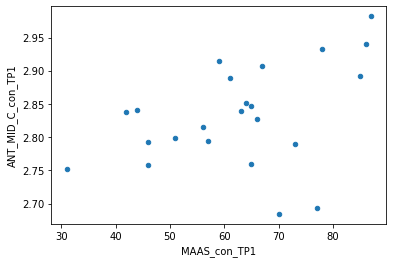

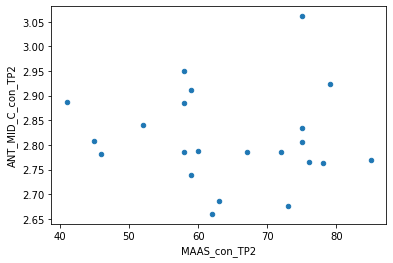

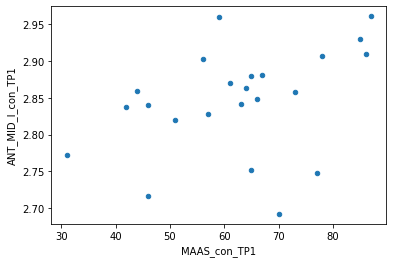

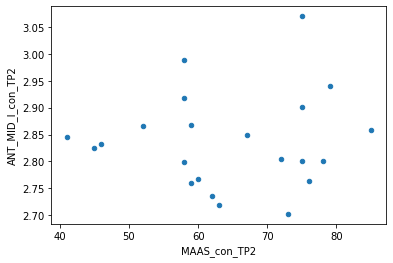

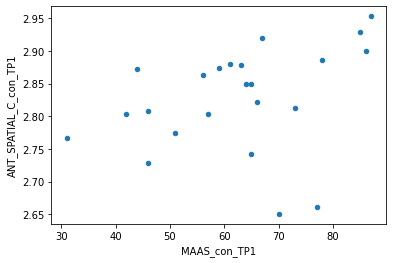

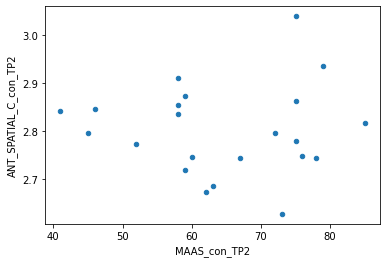

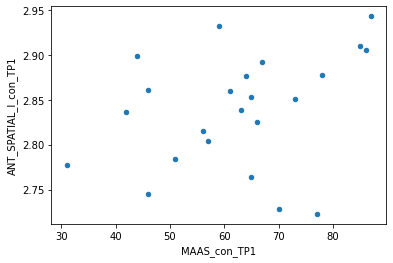

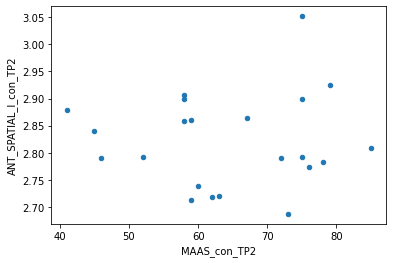

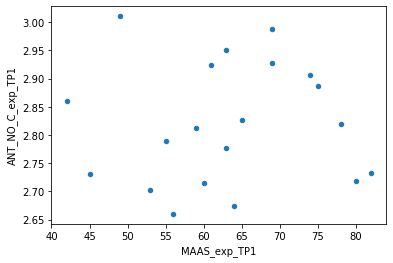

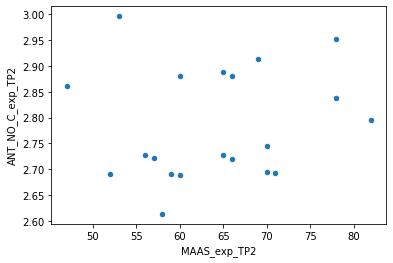

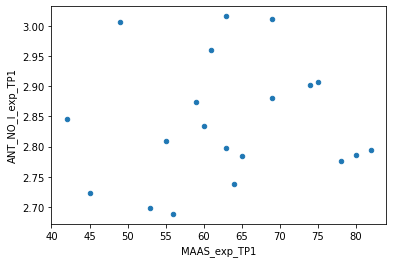

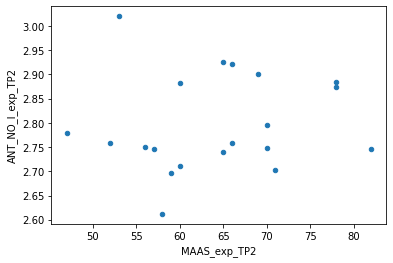

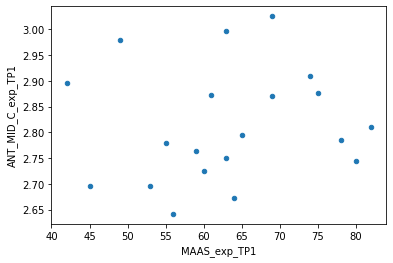

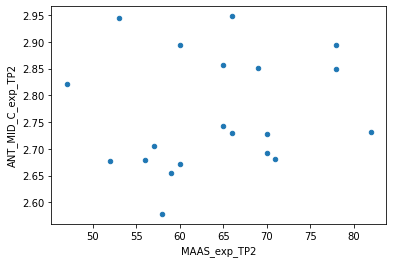

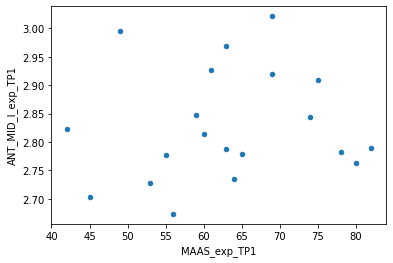

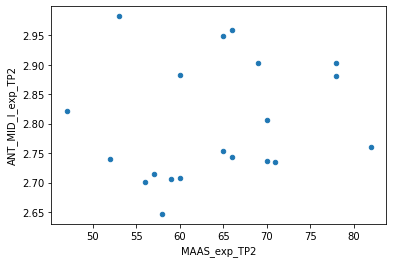

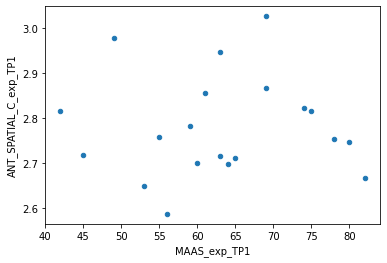

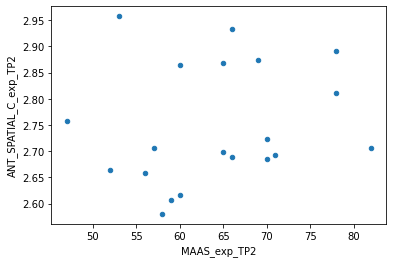

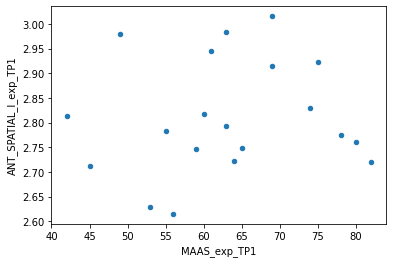

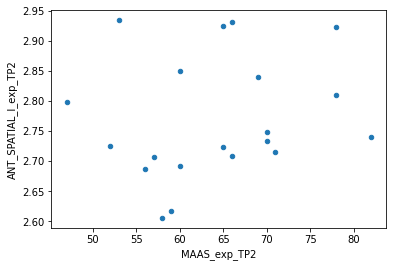

In [13]:
#scatter and correlation function on data frames (second way of plotting correlations)
df_ANT_MAAS_con.plot.scatter('MAAS_con_TP1','ANT_NO_C_con_TP1')
df_ANT_MAAS_con.plot.scatter('MAAS_con_TP2','ANT_NO_C_con_TP2')
df_ANT_MAAS_con.plot.scatter('MAAS_con_TP1','ANT_NO_I_con_TP1')
df_ANT_MAAS_con.plot.scatter('MAAS_con_TP2','ANT_NO_I_con_TP2')

df_ANT_MAAS_con.plot.scatter('MAAS_con_TP1','ANT_MID_C_con_TP1')
df_ANT_MAAS_con.plot.scatter('MAAS_con_TP2','ANT_MID_C_con_TP2')
df_ANT_MAAS_con.plot.scatter('MAAS_con_TP1','ANT_MID_I_con_TP1')
df_ANT_MAAS_con.plot.scatter('MAAS_con_TP2','ANT_MID_I_con_TP2')

df_ANT_MAAS_con.plot.scatter('MAAS_con_TP1','ANT_SPATIAL_C_con_TP1')
df_ANT_MAAS_con.plot.scatter('MAAS_con_TP2','ANT_SPATIAL_C_con_TP2')
df_ANT_MAAS_con.plot.scatter('MAAS_con_TP1','ANT_SPATIAL_I_con_TP1')
df_ANT_MAAS_con.plot.scatter('MAAS_con_TP2','ANT_SPATIAL_I_con_TP2')

df_ANT_MAAS_exp.plot.scatter('MAAS_exp_TP1','ANT_NO_C_exp_TP1')
df_ANT_MAAS_exp.plot.scatter('MAAS_exp_TP2','ANT_NO_C_exp_TP2')
df_ANT_MAAS_exp.plot.scatter('MAAS_exp_TP1','ANT_NO_I_exp_TP1')
df_ANT_MAAS_exp.plot.scatter('MAAS_exp_TP2','ANT_NO_I_exp_TP2')

df_ANT_MAAS_exp.plot.scatter('MAAS_exp_TP1','ANT_MID_C_exp_TP1')
df_ANT_MAAS_exp.plot.scatter('MAAS_exp_TP2','ANT_MID_C_exp_TP2')
df_ANT_MAAS_exp.plot.scatter('MAAS_exp_TP1','ANT_MID_I_exp_TP1')
df_ANT_MAAS_exp.plot.scatter('MAAS_exp_TP2','ANT_MID_I_exp_TP2')

df_ANT_MAAS_exp.plot.scatter('MAAS_exp_TP1','ANT_SPATIAL_C_exp_TP1')
df_ANT_MAAS_exp.plot.scatter('MAAS_exp_TP2','ANT_SPATIAL_C_exp_TP2')
df_ANT_MAAS_exp.plot.scatter('MAAS_exp_TP1','ANT_SPATIAL_I_exp_TP1')
df_ANT_MAAS_exp.plot.scatter('MAAS_exp_TP2','ANT_SPATIAL_I_exp_TP2')


In [14]:
print("In general, the correlation between ANT and MAAS increase for TP2 in the experimental group, however there is a small correlation between these two variables.")
df_ANT_MAAS_exp_corr = df_ANT_MAAS_exp.corr()
df_ANT_MAAS_exp_corr.to_csv (r'/Users/mariamora/Documents/PhD/Courses/3rd_Year/Python/Final_project/ANT_MAAS_exp_Correlations.csv', header=True) 
df_ANT_MAAS_exp_corr

In general, the correlation between ANT and MAAS increase for TP2 in the experimental group, however there is a small correlation between these two variables.


,MAAS_exp_TP1,MAAS_exp_TP2,ANT_NO_C_exp_TP1,ANT_NO_C_exp_TP2,ANT_NO_I_exp_TP1,ANT_NO_I_exp_TP2,ANT_MID_C_exp_TP1,ANT_MID_C_exp_TP2,ANT_MID_I_exp_TP1,ANT_MID_I_exp_TP2,ANT_SPATIAL_C_exp_TP1,ANT_SPATIAL_C_exp_TP2,ANT_SPATIAL_I_exp_TP1,ANT_SPATIAL_I_exp_TP2,Alerting_exp_TP1,Alerting_exp_TP2,fMRI_TP1,fMRI_TP2
MAAS_exp_TP1,1.000000,0.598254,0.027433,0.021627,0.083765,0.037295,0.111399,0.118367,0.114477,0.093852,0.000403,0.142288,0.115643,0.140021,-0.202852,-0.231697,-0.195763,-0.069367
MAAS_exp_TP2,0.598254,1.000000,0.098197,0.133927,0.135778,0.106448,0.054284,0.142558,0.180788,0.170583,-0.004999,0.173917,0.236798,0.179296,0.149387,-0.008341,-0.207391,0.143401
ANT_NO_C_exp_TP1,0.027433,0.098197,1.000000,0.918124,0.915871,0.915273,0.945189,0.928039,0.926251,0.922253,0.934175,0.936964,0.904569,0.916020,0.060227,0.105522,-0.582616,0.082825
ANT_NO_C_exp_TP2,0.021627,0.133927,0.918124,1.000000,0.820920,0.917090,0.878230,0.953172,0.852152,0.922191,0.836200,0.949180,0.848597,0.931675,0.054526,0.298822,-0.666644,0.080741
ANT_NO_I_exp_TP1,0.083765,0.135778,0.915871,0.820920,1.000000,0.916668,0.922988,0.893727,0.973331,0.929346,0.933053,0.919034,0.949195,0.923360,-0.112964,-0.089927,-0.419238,-0.063301
ANT_NO_I_exp_TP2,0.037295,0.106448,0.915273,0.917090,0.916668,1.000000,0.891015,0.934494,0.928843,0.967872,0.899709,0.952312,0.928032,0.938604,0.010910,0.104433,-0.524603,-0.088167
ANT_MID_C_exp_TP1,0.111399,0.054284,0.945189,0.878230,0.922988,0.891015,1.000000,0.929287,0.919308,0.931199,0.924216,0.921121,0.892994,0.930867,-0.261946,-0.026247,-0.516548,0.144339
ANT_MID_C_exp_TP2,0.118367,0.142558,0.928039,0.953172,0.893727,0.934494,0.929287,1.000000,0.886705,0.953769,0.865435,0.975936,0.890413,0.955858,-0.077579,0.001087,-0.537757,0.102972
ANT_MID_I_exp_TP1,0.114477,0.180788,0.926251,0.852152,0.973331,0.928843,0.919308,0.886705,1.000000,0.942866,0.939907,0.920282,0.956673,0.921832,-0.065685,0.042622,-0.507663,-0.074285
ANT_MID_I_exp_TP2,0.093852,0.170583,0.922253,0.922191,0.929346,0.967872,0.931199,0.953769,0.942866,1.000000,0.907159,0.964307,0.950012,0.964081,-0.100769,0.050683,-0.548263,0.038126


In [15]:
print("In general, the correlation between ANT and MAAS decrease for TP2 in the control group.")
##note to self: find a way to visualize this (maybe correlation matrix?)
df_ANT_MAAS_con_corr = df_ANT_MAAS_con.corr()
df_ANT_MAAS_con_corr.to_csv(r'/Users/mariamora/Documents/PhD/Courses/3rd_Year/Python/Final_project/ANT_MAAS_con_Correlations.csv', header=True) 
df_ANT_MAAS_con_corr

In general, the correlation between ANT and MAAS decrease for TP2 in the control group.


,MAAS_con_TP1,MAAS_con_TP2,ANT_NO_C_con_TP1,ANT_NO_C_con_TP2,ANT_NO_I_con_TP1,ANT_NO_I_con_TP2,ANT_MID_C_con_TP1,ANT_MID_C_con_TP2,ANT_MID_I_con_TP1,ANT_MID_I_con_TP2,ANT_SPATIAL_C_con_TP1,ANT_SPATIAL_C_con_TP2,ANT_SPATIAL_I_con_TP1,ANT_SPATIAL_I_con_TP2,Alerting_con_TP1,Alerting_con_TP2,fMRI_TP1,fMRI_TP2
MAAS_con_TP1,1.000000,0.810946,0.353285,0.076191,0.283338,0.197810,0.409398,0.086180,0.375946,0.194094,0.315949,0.182274,0.325384,0.221072,-0.128959,-0.111247,0.011900,0.011193
MAAS_con_TP2,0.810946,1.000000,0.186064,-0.085286,0.216211,0.057499,0.303235,-0.050675,0.279255,0.069098,0.226627,0.015669,0.175238,0.042494,-0.242575,-0.129451,-0.066371,0.090251
ANT_NO_C_con_TP1,0.353285,0.186064,1.000000,0.604938,0.836092,0.642898,0.846151,0.638098,0.912650,0.577399,0.843898,0.664887,0.893763,0.688752,0.309950,-0.256974,0.004312,0.159747
ANT_NO_C_con_TP2,0.076191,-0.085286,0.604938,1.000000,0.756437,0.938918,0.756796,0.944537,0.616591,0.910917,0.773323,0.903475,0.758187,0.878379,-0.255393,-0.120740,-0.115787,-0.169394
ANT_NO_I_con_TP1,0.283338,0.216211,0.836092,0.756437,1.000000,0.743204,0.894412,0.732875,0.898208,0.708870,0.935785,0.743441,0.896967,0.774339,-0.074950,-0.142246,-0.033892,0.001004
ANT_NO_I_con_TP2,0.197810,0.057499,0.642898,0.938918,0.743204,1.000000,0.731242,0.923052,0.618101,0.901716,0.731276,0.908949,0.738070,0.905102,-0.149747,-0.242875,-0.054233,0.042126
ANT_MID_C_con_TP1,0.409398,0.303235,0.846151,0.756796,0.894412,0.731242,1.000000,0.753300,0.897569,0.765176,0.932197,0.787036,0.911116,0.762664,-0.240002,-0.217851,0.030622,-0.068907
ANT_MID_C_con_TP2,0.086180,-0.050675,0.638098,0.944537,0.732875,0.923052,0.753300,1.000000,0.668865,0.907923,0.751115,0.929403,0.746301,0.907196,-0.205653,-0.432392,-0.050888,-0.142540
ANT_MID_I_con_TP1,0.375946,0.279255,0.912650,0.616591,0.898208,0.618101,0.897569,0.668865,1.000000,0.588576,0.917139,0.656538,0.921578,0.663360,0.061268,-0.310327,0.024138,0.051086
ANT_MID_I_con_TP2,0.194094,0.069098,0.577399,0.910917,0.708870,0.901716,0.765176,0.907923,0.588576,1.000000,0.741571,0.902685,0.678834,0.925144,-0.332875,-0.262964,-0.002422,-0.067426


In [16]:
## Table with Alerting, Orienting and Executive (conflict) effects for the control group

##create a function to calculate the corresponding alerting, orienting, and executive effect##
def behavioural_effect(a,b,c,d,e=None,f=None):
    """This function takes 4 dataseries, converts them to an array, calculates the mean between a&b or a&b&e , and c&d or c&d&f, and then substract these two results
       to find and return the corresponding behavioural effect"""
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)
    d = np.array(d)
    e = np.array(e)
    f = np.array(f)
    
    if e.any() and f.any():
        effect = (a+b+e)/3 -(c+d+f)/3
    else:
        effect = (a+b)/2 -(c+d)/2
    return effect

column_names_con = 'subject', 'MAAS_con_TP1', 'MAAS_con_TP2', 'alerting_TP1','alerting_TP2', 'orienting_TP1','orienting_TP2','executive_TP1','executive_TP2' 
df_ANT_MAAS_con_BehaviouralEffects = pd.DataFrame(columns=column_names_con)
df_ANT_MAAS_con_BehaviouralEffects['subject'] = df_ANT_MAAS_con['subject']
df_ANT_MAAS_con_BehaviouralEffects['MAAS_con_TP1'] = df_ANT_MAAS_con['MAAS_con_TP1']
df_ANT_MAAS_con_BehaviouralEffects['MAAS_con_TP2'] = df_ANT_MAAS_con['MAAS_con_TP2']
df_ANT_MAAS_con_BehaviouralEffects['alerting_TP1'] = behavioural_effect(df_ANT_MAAS_con['ANT_NO_C_con_TP1'],df_ANT_MAAS_con['ANT_NO_I_con_TP1'],df_ANT_MAAS_con['ANT_MID_C_con_TP1'],df_ANT_MAAS_con['ANT_MID_I_con_TP1'])
df_ANT_MAAS_con_BehaviouralEffects['alerting_TP2'] = behavioural_effect(df_ANT_MAAS_con['ANT_NO_C_con_TP2'],df_ANT_MAAS_con['ANT_NO_I_con_TP2'],df_ANT_MAAS_con['ANT_MID_C_con_TP2'],df_ANT_MAAS_con['ANT_MID_I_con_TP2'])
df_ANT_MAAS_con_BehaviouralEffects['orienting_TP1'] = behavioural_effect(df_ANT_MAAS_con['ANT_MID_C_con_TP1'],df_ANT_MAAS_con['ANT_MID_I_con_TP1'],df_ANT_MAAS_con['ANT_SPATIAL_C_con_TP1'],df_ANT_MAAS_con['ANT_SPATIAL_I_con_TP1'])
df_ANT_MAAS_con_BehaviouralEffects['orienting_TP2'] = behavioural_effect(df_ANT_MAAS_con['ANT_MID_C_con_TP2'],df_ANT_MAAS_con['ANT_MID_I_con_TP2'],df_ANT_MAAS_con['ANT_SPATIAL_C_con_TP2'],df_ANT_MAAS_con['ANT_SPATIAL_I_con_TP2'])
df_ANT_MAAS_con_BehaviouralEffects['executive_TP1'] = behavioural_effect(df_ANT_MAAS_con['ANT_NO_I_con_TP1'],df_ANT_MAAS_con['ANT_MID_I_con_TP1'],df_ANT_MAAS_con['ANT_NO_C_con_TP1'],df_ANT_MAAS_con['ANT_MID_C_con_TP1'],df_ANT_MAAS_con['ANT_SPATIAL_I_con_TP1'],df_ANT_MAAS_con['ANT_SPATIAL_C_con_TP1'])
df_ANT_MAAS_con_BehaviouralEffects['executive_TP2'] = behavioural_effect(df_ANT_MAAS_con['ANT_NO_I_con_TP2'],df_ANT_MAAS_con['ANT_MID_I_con_TP2'],df_ANT_MAAS_con['ANT_NO_C_con_TP2'],df_ANT_MAAS_con['ANT_MID_C_con_TP2'],df_ANT_MAAS_con['ANT_SPATIAL_I_con_TP2'],df_ANT_MAAS_con['ANT_SPATIAL_C_con_TP2'])

df_ANT_MAAS_con_BehaviouralEffects['fMRI_TP1'] = fMRI_con_TP1
df_ANT_MAAS_con_BehaviouralEffects['fMRI_TP2'] = fMRI_con_TP2

df_ANT_MAAS_con_BehaviouralEffects

,subject,MAAS_con_TP1,MAAS_con_TP2,alerting_TP1,alerting_TP2,orienting_TP1,orienting_TP2,executive_TP1,executive_TP2,fMRI_TP1,fMRI_TP2
0,conABaKa89,59.0,59.0,-0.013391,0.023232,0.033968,0.022322,0.017842,-0.017928,-0.9479,-0.8840
1,conABaNi91,85.0,72.0,0.016272,0.055660,-0.008226,0.002006,0.014848,-0.005231,-0.3229,-2.1138
2,conABrOl79,66.0,76.0,0.017140,0.016054,0.015186,0.003598,0.034948,0.014005,0.1404,-1.3383
3,conAHoDi71,67.0,79.0,-0.022214,-0.019968,-0.011799,0.002635,-0.003894,-0.004021,-2.0958,-2.9853
4,conAKoMa88,70.0,63.0,0.018011,0.031209,-0.001337,-0.001577,0.030729,0.033255,-0.3670,-1.8146
5,conAKoSe98,51.0,59.0,-0.020327,-0.009625,0.030385,0.033895,0.026089,0.006843,2.3582,-0.1510
6,conAPiCh69,61.0,58.0,0.014751,0.023927,0.010031,0.025797,-0.016076,-0.008625,-0.6220,-2.1888
7,conAPoAr64,56.0,58.0,0.027495,-0.013772,0.019576,-0.054736,0.003345,0.025615,-0.4918,-0.2512
8,conASpCh59,78.0,75.0,-0.003097,-0.009652,0.037451,-0.013784,0.001025,0.035432,0.3503,-0.8339
9,conATsTr93,46.0,46.0,0.033526,0.041681,0.000862,-0.011672,0.010312,-0.003422,-0.0151,-0.2777


In [17]:
## Table with Alerting, Orienting and Executive (conflict) effects for the experimental group
column_names_exp = 'subject', 'MAAS_exp_TP1', 'MAAS_exp_TP2', 'alerting_TP1','alerting_TP2', 'orienting_TP1','orienting_TP2','executive_TP1','executive_TP2'  
df_ANT_MAAS_exp_BehaviouralEffects = pd.DataFrame(columns=column_names_exp)
df_ANT_MAAS_exp_BehaviouralEffects['subject'] = df_ANT_MAAS_exp['subject']
df_ANT_MAAS_exp_BehaviouralEffects['MAAS_exp_TP1'] = df_ANT_MAAS_exp['MAAS_exp_TP1']
df_ANT_MAAS_exp_BehaviouralEffects['MAAS_exp_TP2'] = df_ANT_MAAS_exp['MAAS_exp_TP2']
#.... maybe change this part of the code and use the apply function of the dataframe
df_ANT_MAAS_exp_BehaviouralEffects['alerting_TP1'] = behavioural_effect(df_ANT_MAAS_exp['ANT_NO_C_exp_TP1'],df_ANT_MAAS_exp['ANT_NO_I_exp_TP1'],df_ANT_MAAS_exp['ANT_MID_C_exp_TP1'],df_ANT_MAAS_exp['ANT_MID_I_exp_TP1'])
df_ANT_MAAS_exp_BehaviouralEffects['alerting_TP2'] = behavioural_effect(df_ANT_MAAS_exp['ANT_NO_C_exp_TP2'],df_ANT_MAAS_exp['ANT_NO_I_exp_TP2'],df_ANT_MAAS_exp['ANT_MID_C_exp_TP2'],df_ANT_MAAS_exp['ANT_MID_I_exp_TP2'])
df_ANT_MAAS_exp_BehaviouralEffects['orienting_TP1'] = behavioural_effect(df_ANT_MAAS_exp['ANT_MID_C_exp_TP1'],df_ANT_MAAS_exp['ANT_MID_I_exp_TP1'],df_ANT_MAAS_exp['ANT_SPATIAL_C_exp_TP1'],df_ANT_MAAS_exp['ANT_SPATIAL_I_exp_TP1'])
df_ANT_MAAS_exp_BehaviouralEffects['orienting_TP2'] = behavioural_effect(df_ANT_MAAS_exp['ANT_MID_C_exp_TP2'],df_ANT_MAAS_exp['ANT_MID_I_exp_TP2'],df_ANT_MAAS_exp['ANT_SPATIAL_C_exp_TP2'],df_ANT_MAAS_exp['ANT_SPATIAL_I_exp_TP2'])
df_ANT_MAAS_exp_BehaviouralEffects['executive_TP1'] = behavioural_effect(df_ANT_MAAS_exp['ANT_NO_I_exp_TP1'],df_ANT_MAAS_exp['ANT_MID_I_exp_TP1'],df_ANT_MAAS_exp['ANT_NO_C_exp_TP1'],df_ANT_MAAS_exp['ANT_MID_C_exp_TP1'],df_ANT_MAAS_exp['ANT_SPATIAL_I_exp_TP1'],df_ANT_MAAS_exp['ANT_SPATIAL_C_exp_TP1'])
df_ANT_MAAS_exp_BehaviouralEffects['executive_TP2'] = behavioural_effect(df_ANT_MAAS_exp['ANT_NO_I_exp_TP2'],df_ANT_MAAS_exp['ANT_MID_I_exp_TP2'],df_ANT_MAAS_exp['ANT_NO_C_exp_TP2'],df_ANT_MAAS_exp['ANT_MID_C_exp_TP2'],df_ANT_MAAS_exp['ANT_SPATIAL_I_exp_TP2'],df_ANT_MAAS_exp['ANT_SPATIAL_C_exp_TP2'])

df_ANT_MAAS_exp_BehaviouralEffects['fMRI_TP1'] = fMRI_exp_TP1
df_ANT_MAAS_exp_BehaviouralEffects['fMRI_TP2'] = fMRI_exp_TP2
df_ANT_MAAS_exp_BehaviouralEffects

,subject,MAAS_exp_TP1,MAAS_exp_TP2,alerting_TP1,alerting_TP2,orienting_TP1,orienting_TP2,executive_TP1,executive_TP2,fMRI_TP1,fMRI_TP2
0,expABeCo96,59.0,57.0,0.037922,0.023370,0.040486,0.004222,0.036735,0.011149,-0.4331,-1.3512
1,expAChAn75,49.0,53.0,0.020659,0.044375,0.009336,0.017830,0.004614,0.012824,-1.6980,-2.2651
2,expADuAl92,60.0,70.0,0.005302,-0.002766,0.010335,0.039748,0.107944,0.087641,-0.0027,-0.0176
3,expAKaCh83,82.0,66.0,-0.036145,0.002505,0.106059,0.037350,0.031544,0.024375,0.9824,-0.4550
4,expAKeJo83,42.0,47.0,-0.006516,-0.001796,0.044787,0.043873,-0.029983,-0.013082,-0.8533,2.4161
5,expALeMa78,64.0,60.0,0.002886,0.010351,-0.006174,0.035064,0.050226,0.044371,-1.1186,-1.0542
6,expAMaIn73,69.0,65.0,-0.023894,0.003962,0.002580,0.006221,0.003204,0.062157,-3.1582,1.0359
7,expARiVi71,75.0,78.0,0.004852,0.019428,0.023685,-0.007476,0.053783,-0.008821,-2.0734,-0.6380
8,expARoeMa94,56.0,58.0,0.016751,0.000135,0.056906,0.019531,0.029567,0.030689,0.7196,-0.0324
9,expAStLe96,65.0,82.0,0.017850,0.024433,0.057918,0.022856,-0.006487,0.005139,-2.2975,1.6949


Text(0.5, 1.0, 'Control Parameter Estimates')

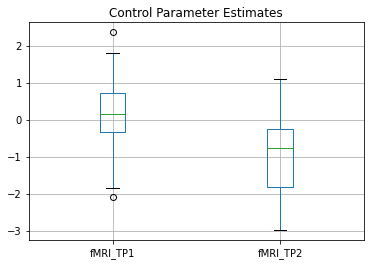

In [18]:
## Box plot - parameter estimates
boxplot_control = df_ANT_MAAS_con_BehaviouralEffects.boxplot(column=['fMRI_TP1', 'fMRI_TP2'])
plt.title('Control Parameter Estimates')



Text(0.5, 1.0, 'Experimental Parameter Estimates')

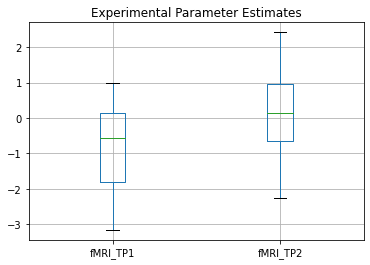

In [19]:
boxplot_experimental = df_ANT_MAAS_exp_BehaviouralEffects.boxplot(column=['fMRI_TP1', 'fMRI_TP2'])
plt.title('Experimental Parameter Estimates')

,MAAS_exp_TP1,MAAS_exp_TP2,alerting_TP1,alerting_TP2,orienting_TP1,orienting_TP2,executive_TP1,executive_TP2,fMRI_TP1,fMRI_TP2
MAAS_exp_TP1,1.000000,0.598254,-0.310286,-0.356571,0.165546,-0.212414,0.185022,-0.047879,-0.195763,-0.069367
MAAS_exp_TP2,0.598254,1.000000,0.013101,-0.165230,-0.047177,-0.141661,0.445889,-0.041401,-0.207391,0.143401
alerting_TP1,-0.310286,0.013101,1.000000,0.251964,-0.384535,-0.139424,0.056991,-0.185647,0.054036,-0.158952
alerting_TP2,-0.356571,-0.165230,0.251964,1.000000,-0.121709,-0.240948,-0.119105,-0.093690,-0.247742,-0.334591
orienting_TP1,0.165546,-0.047177,-0.384535,-0.121709,1.000000,0.328960,-0.239887,-0.304176,0.131362,0.241112
orienting_TP2,-0.212414,-0.141661,-0.139424,-0.240948,0.328960,1.000000,-0.102040,0.066435,0.264416,0.293154
executive_TP1,0.185022,0.445889,0.056991,-0.119105,-0.239887,-0.102040,1.000000,0.510389,0.322420,-0.409884
executive_TP2,-0.047879,-0.041401,-0.185647,-0.093690,-0.304176,0.066435,0.510389,1.000000,0.319076,-0.298608
fMRI_TP1,-0.195763,-0.207391,0.054036,-0.247742,0.131362,0.264416,0.322420,0.319076,1.000000,-0.236547
fMRI_TP2,-0.069367,0.143401,-0.158952,-0.334591,0.241112,0.293154,-0.409884,-0.298608,-0.236547,1.000000


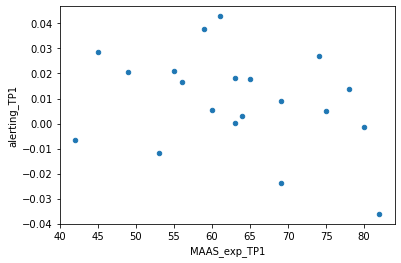

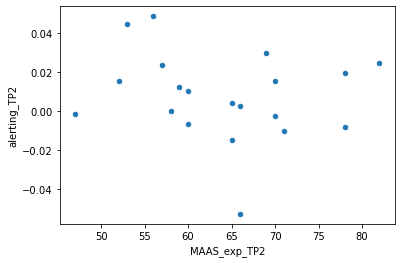

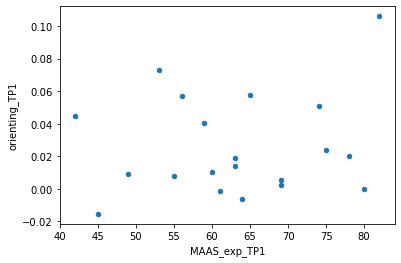

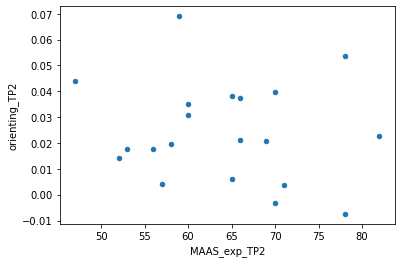

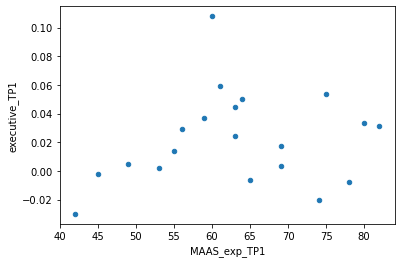

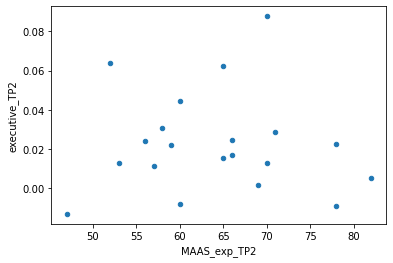

In [20]:
### plotting correlations between MAAS and alerting Effects experimental group..
df_ANT_MAAS_exp_BehaviouralEffects.plot.scatter('MAAS_exp_TP1','alerting_TP1')
df_ANT_MAAS_exp_BehaviouralEffects.plot.scatter('MAAS_exp_TP2','alerting_TP2')
df_ANT_MAAS_exp_BehaviouralEffects.plot.scatter('MAAS_exp_TP1','orienting_TP1')
df_ANT_MAAS_exp_BehaviouralEffects.plot.scatter('MAAS_exp_TP2','orienting_TP2')
df_ANT_MAAS_exp_BehaviouralEffects.plot.scatter('MAAS_exp_TP1','executive_TP1')
df_ANT_MAAS_exp_BehaviouralEffects.plot.scatter('MAAS_exp_TP2','executive_TP2')
df_ANT_MAAS_exp_BehaviouralEffects.corr()

,MAAS_con_TP1,MAAS_con_TP2,alerting_TP1,alerting_TP2,orienting_TP1,orienting_TP2,executive_TP1,executive_TP2,fMRI_TP1,fMRI_TP2
MAAS_con_TP1,1.000000,0.810946,-0.290958,-0.019840,0.328708,-0.208008,-0.318787,0.314975,0.011900,0.011193
MAAS_con_TP2,0.810946,1.000000,-0.327306,-0.069956,0.359937,-0.072692,-0.185856,0.359946,-0.066371,0.090251
alerting_TP1,-0.290958,-0.327306,1.000000,0.410378,-0.430124,-0.319328,0.230137,0.243152,-0.129777,0.306343
alerting_TP2,-0.019840,-0.069956,0.410378,1.000000,-0.413297,-0.219531,0.224816,-0.054213,-0.189930,0.164543
orienting_TP1,0.328708,0.359937,-0.430124,-0.413297,1.000000,-0.021071,-0.196426,0.008859,0.155962,0.093495
orienting_TP2,-0.208008,-0.072692,-0.319328,-0.219531,-0.021071,1.000000,0.201466,-0.111207,0.220721,-0.131400
executive_TP1,-0.318787,-0.185856,0.230137,0.224816,-0.196426,0.201466,1.000000,0.011993,-0.041751,0.046437
executive_TP2,0.314975,0.359946,0.243152,-0.054213,0.008859,-0.111207,0.011993,1.000000,0.037835,0.437207
fMRI_TP1,0.011900,-0.066371,-0.129777,-0.189930,0.155962,0.220721,-0.041751,0.037835,1.000000,0.496343
fMRI_TP2,0.011193,0.090251,0.306343,0.164543,0.093495,-0.131400,0.046437,0.437207,0.496343,1.000000


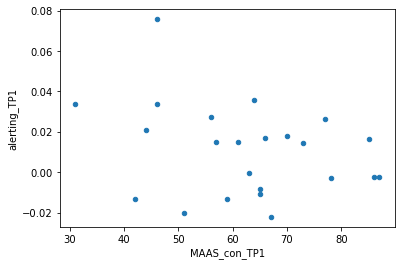

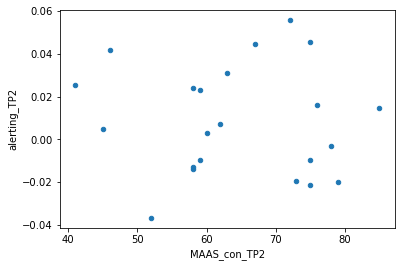

In [21]:
### plotting correlations between MAAS and alerting Effects control group..
df_ANT_MAAS_con_BehaviouralEffects.plot.scatter('MAAS_con_TP1','alerting_TP1')
df_ANT_MAAS_con_BehaviouralEffects.plot.scatter('MAAS_con_TP2','alerting_TP2')

df_ANT_MAAS_con_BehaviouralEffects.corr()

In [22]:
#check if fMRI subjects and Behavioural Effects are the same
subjects_fMRI_con = fMRI_Data_con.groupby('subject').count().reset_index()
subjects_fMRI_exp = fMRI_Data_exp.groupby('subject').count().reset_index()
print(np.where(df_ANT_MAAS_con_BehaviouralEffects['subject'] != subjects_fMRI_con['subject']))
print(np.where(df_ANT_MAAS_exp_BehaviouralEffects['subject'] != subjects_fMRI_exp['subject']))

#subjects_fMRI_con
#subjects_fMRI_exp

#fMRI_con_TP1

(array([], dtype=int64),)
(array([], dtype=int64),)


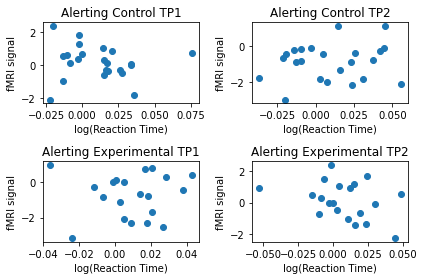

In [23]:
# Correlation between alerting behavioural effect and fMRI mid-cc Activations

f5, axs5 = plt.subplots(nrows=2, ncols=2)

axs5[0,0].scatter(np.array(df_ANT_MAAS_con_BehaviouralEffects['alerting_TP1']),fMRI_con_TP1)
axs5[0,0].set_title('Alerting Control TP1')
axs5[0,0].set_xlabel('log(Reaction Time)')
axs5[0,0].set_ylabel('fMRI signal')

axs5[0,1].scatter(np.array(df_ANT_MAAS_con_BehaviouralEffects['alerting_TP2']),fMRI_con_TP2)
axs5[0,1].set_title('Alerting Control TP2')
axs5[0,1].set_xlabel('log(Reaction Time)')
axs5[0,1].set_ylabel('fMRI signal')

axs5[1,0].scatter(np.array(df_ANT_MAAS_exp_BehaviouralEffects['alerting_TP1']),fMRI_exp_TP1)
axs5[1,0].set_title('Alerting Experimental TP1')
axs5[1,0].set_xlabel('log(Reaction Time)')
axs5[1,0].set_ylabel('fMRI signal')


axs5[1,1].scatter(np.array(df_ANT_MAAS_exp_BehaviouralEffects['alerting_TP2']),fMRI_exp_TP2)
axs5[1,1].set_title('Alerting Experimental TP2')
axs5[1,1].set_xlabel('log(Reaction Time)')
axs5[1,1].set_ylabel('fMRI signal')

f5.tight_layout()
## A bigger number in the log(Reaction Time) means the alerting effect was greater

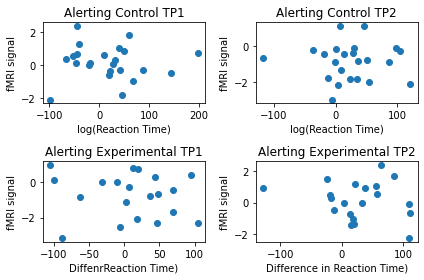

In [24]:
# Correlation between alerting behavioural effect and fMRI mid-cc Activations untransformed Data

f5, axs5 = plt.subplots(nrows=2, ncols=2)

axs5[0,0].scatter(alerting_con_TP1,fMRI_con_TP1)
axs5[0,0].set_title('Alerting Control TP1')
axs5[0,0].set_xlabel('log(Reaction Time)')
axs5[0,0].set_ylabel('fMRI signal')

axs5[0,1].scatter(alerting_con_TP2,fMRI_con_TP2)
axs5[0,1].set_title('Alerting Control TP2')
axs5[0,1].set_xlabel('log(Reaction Time)')
axs5[0,1].set_ylabel('fMRI signal')

axs5[1,0].scatter(alerting_exp_TP1,fMRI_exp_TP1)
axs5[1,0].set_title('Alerting Experimental TP1')
axs5[1,0].set_xlabel('DiffenrReaction Time)')
axs5[1,0].set_ylabel('fMRI signal')


axs5[1,1].scatter(alerting_exp_TP2,fMRI_exp_TP2)
axs5[1,1].set_title('Alerting Experimental TP2')
axs5[1,1].set_xlabel('Difference in Reaction Time)')
axs5[1,1].set_ylabel('fMRI signal')

f5.tight_layout()

The correlation between fMRI signal and Alerting Effect for Control Group TP1 is -0.025
The correlation between fMRI signal and Alerting Effect for Control Group TP2 is -0.017
The correlation between fMRI signal and Alerting Effect for Exp Group TP1 is -0.117
The correlation between fMRI signal and Alerting Effect for Exp Group TP2 is -0.158


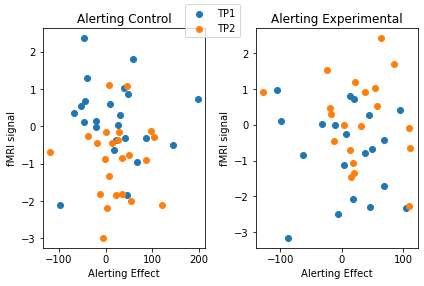

In [25]:
# Correlation between alerting behavioural effect and fMRI mid-cc Activations (overlapped) untransformed

f, axs = plt.subplots(nrows=1, ncols=2)

axs[0].scatter(alerting_con_TP1,fMRI_con_TP1, label = 'TP1')
axs[0].scatter(alerting_con_TP2,fMRI_con_TP2, label = 'TP2')
axs[0].set_title('Alerting Control')
axs[0].set_xlabel('Alerting Effect')
axs[0].set_ylabel('fMRI signal')

axs[1].scatter(alerting_exp_TP1,fMRI_exp_TP1)
axs[1].scatter(alerting_exp_TP2,fMRI_exp_TP2)
axs[1].set_title('Alerting Experimental')
axs[1].set_xlabel('Alerting Effect')
axs[1].set_ylabel('fMRI signal')

f.legend(loc = 'upper center')

r_con_TP1 = np.corrcoef(alerting_con_TP1,fMRI_con_TP1)
r_con_TP2 = np.corrcoef(alerting_con_TP2,fMRI_con_TP2)

r_exp_TP1 = np.corrcoef(alerting_exp_TP1,fMRI_exp_TP1)
r_exp_TP2 = np.corrcoef(alerting_exp_TP2,fMRI_exp_TP2)

print('The correlation between fMRI signal and Alerting Effect for Control Group TP1 is %.3f' %r_con_TP1[0,1])
#print(r_con_TP1[1,0])

print('The correlation between fMRI signal and Alerting Effect for Control Group TP2 is %.3f' %r_con_TP2[0,1])
#print(r_con_TP2[1,0])

print('The correlation between fMRI signal and Alerting Effect for Exp Group TP1 is %.3f' %r_exp_TP1[0,1])
#print(r_exp_TP1[1,0])

print('The correlation between fMRI signal and Alerting Effect for Exp Group TP2 is %.3f' %r_exp_TP2[0,1])
#print(r_exp_TP2[1,0])

f.tight_layout()

## do the same but for fMRI signal and MAAS

The correlation between MAAS score and Alerting Effect for Control Group TP1 is -0.129
The correlation between MAAS score and Alerting Effect for Control Group TP2 is nan
The correlation between MAAS score and Alerting Effect for Exp Group TP1 is -0.203
The correlation between MAAS score and Alerting Effect for Exp Group TP2 is -0.008


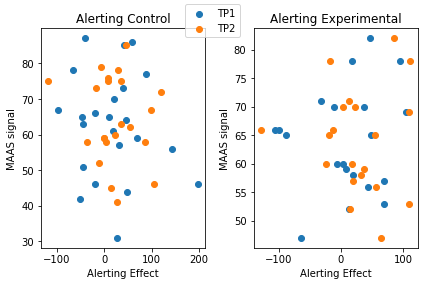

In [26]:
# Correlation between alerting behavioural effect and MAAS (overlapped) untransformed

f, axs = plt.subplots(nrows=1, ncols=2)

axs[0].scatter(alerting_con_TP1,np.array(df_ANT_MAAS_con_BehaviouralEffects['MAAS_con_TP1']), label = 'TP1')
axs[0].scatter(alerting_con_TP2,np.array(df_ANT_MAAS_con_BehaviouralEffects['MAAS_con_TP2']), label = 'TP2')
axs[0].set_title('Alerting Control')
axs[0].set_xlabel('Alerting Effect')
axs[0].set_ylabel('MAAS signal')

axs[1].scatter(alerting_exp_TP1,np.array(df_ANT_MAAS_exp_BehaviouralEffects['MAAS_exp_TP2']))
axs[1].scatter(alerting_exp_TP2,np.array(df_ANT_MAAS_exp_BehaviouralEffects['MAAS_exp_TP2']))
axs[1].set_title('Alerting Experimental')
axs[1].set_xlabel('Alerting Effect')
axs[1].set_ylabel('MAAS signal')

f.legend(loc = 'upper center')

r_con_TP1 = np.corrcoef(alerting_con_TP1,np.array(df_ANT_MAAS_con_BehaviouralEffects['MAAS_con_TP1']))
r_con_TP2 = np.corrcoef(alerting_con_TP2,np.array(df_ANT_MAAS_con_BehaviouralEffects['MAAS_con_TP2']))

r_exp_TP1 = np.corrcoef(alerting_exp_TP1,np.array(df_ANT_MAAS_exp_BehaviouralEffects['MAAS_exp_TP1']))
r_exp_TP2 = np.corrcoef(alerting_exp_TP2,np.array(df_ANT_MAAS_exp_BehaviouralEffects['MAAS_exp_TP2']))

print('The correlation between MAAS score and Alerting Effect for Control Group TP1 is %.3f' %r_con_TP1[0,1])
#print(r_con_TP1[1,0])

print('The correlation between MAAS score and Alerting Effect for Control Group TP2 is %.3f' %r_con_TP2[0,1])
#print(r_con_TP2[1,0])

print('The correlation between MAAS score and Alerting Effect for Exp Group TP1 is %.3f' %r_exp_TP1[0,1])
#print(r_exp_TP1[1,0])

print('The correlation between MAAS score and Alerting Effect for Exp Group TP2 is %.3f' %r_exp_TP2[0,1])
#print(r_exp_TP2[1,0])

f.tight_layout()

## do the same but for fMRI signal and MAAS

The correlation between fMRI signal and Alerting Effect for Control Group TP1 is -0.130
The correlation between fMRI signal and Alerting Effect for Control Group TP2 is 0.165
The correlation between fMRI signal and Alerting Effect for Exp Group TP1 is 0.054
The correlation between fMRI signal and Alerting Effect for Exp Group TP2 is -0.335


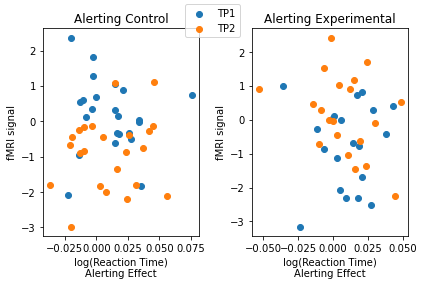

In [27]:
# Correlation between alerting behavioural effect and fMRI mid-cc Activations (overlapped)

f, axs = plt.subplots(nrows=1, ncols=2)

axs[0].scatter(np.array(df_ANT_MAAS_con_BehaviouralEffects['alerting_TP1']),fMRI_con_TP1, label = 'TP1')
axs[0].scatter(np.array(df_ANT_MAAS_con_BehaviouralEffects['alerting_TP2']),fMRI_con_TP2, label = 'TP2')
axs[0].set_title('Alerting Control')
axs[0].set_xlabel('log(Reaction Time)\nAlerting Effect')
axs[0].set_ylabel('fMRI signal')

axs[1].scatter(np.array(df_ANT_MAAS_exp_BehaviouralEffects['alerting_TP1']),fMRI_exp_TP1)
axs[1].scatter(np.array(df_ANT_MAAS_exp_BehaviouralEffects['alerting_TP2']),fMRI_exp_TP2)
axs[1].set_title('Alerting Experimental')
axs[1].set_xlabel('log(Reaction Time)\nAlerting Effect')
axs[1].set_ylabel('fMRI signal')

f.legend(loc = 'upper center')

r_con_TP1 = np.corrcoef(np.array(df_ANT_MAAS_con_BehaviouralEffects['alerting_TP1']),fMRI_con_TP1)
r_con_TP2 = np.corrcoef(np.array(df_ANT_MAAS_con_BehaviouralEffects['alerting_TP2']),fMRI_con_TP2)

r_exp_TP1 = np.corrcoef(np.array(df_ANT_MAAS_exp_BehaviouralEffects['alerting_TP1']),fMRI_exp_TP1)
r_exp_TP2 = np.corrcoef(np.array(df_ANT_MAAS_exp_BehaviouralEffects['alerting_TP2']),fMRI_exp_TP2)

print('The correlation between fMRI signal and Alerting Effect for Control Group TP1 is %.3f' %r_con_TP1[0,1])
#print(r_con_TP1[1,0])

print('The correlation between fMRI signal and Alerting Effect for Control Group TP2 is %.3f' %r_con_TP2[0,1])
#print(r_con_TP2[1,0])

print('The correlation between fMRI signal and Alerting Effect for Exp Group TP1 is %.3f' %r_exp_TP1[0,1])
#print(r_exp_TP1[1,0])

print('The correlation between fMRI signal and Alerting Effect for Exp Group TP2 is %.3f' %r_exp_TP2[0,1])
#print(r_exp_TP2[1,0])

f.tight_layout()

## do the same but for fMRI signal and MAAS

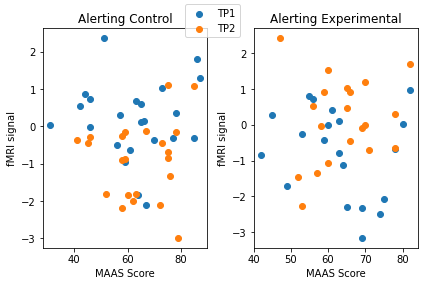

In [28]:
# Correlation between MAAS and fMRI mid-cc Activations (overlapped)

f, axs = plt.subplots(nrows=1, ncols=2)

axs[0].scatter(np.array(df_ANT_MAAS_con_BehaviouralEffects['MAAS_con_TP1']),fMRI_con_TP1, label = 'TP1')
axs[0].scatter(np.array(df_ANT_MAAS_con_BehaviouralEffects['MAAS_con_TP2']),fMRI_con_TP2, label = 'TP2')
axs[0].set_title('Alerting Control')
axs[0].set_xlabel('MAAS Score')
axs[0].set_ylabel('fMRI signal')

axs[1].scatter(np.array(df_ANT_MAAS_exp_BehaviouralEffects['MAAS_exp_TP1']),fMRI_exp_TP1)
axs[1].scatter(np.array(df_ANT_MAAS_exp_BehaviouralEffects['MAAS_exp_TP2']),fMRI_exp_TP2)
axs[1].set_title('Alerting Experimental')
axs[1].set_xlabel('MAAS Score')
axs[1].set_ylabel('fMRI signal')

f.legend(loc = 'upper center')

f.tight_layout()


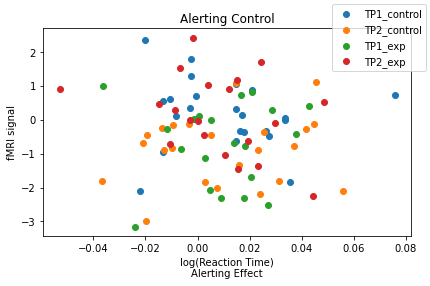

In [29]:
# Correlation between alerting behavioural effect and fMRI mid-cc Activations (all overlapped)

f, ax = plt.subplots()

ax.scatter(np.array(df_ANT_MAAS_con_BehaviouralEffects['alerting_TP1']),fMRI_con_TP1, label = 'TP1_control')
ax.scatter(np.array(df_ANT_MAAS_con_BehaviouralEffects['alerting_TP2']),fMRI_con_TP2, label = 'TP2_control')
ax.scatter(np.array(df_ANT_MAAS_exp_BehaviouralEffects['alerting_TP1']),fMRI_exp_TP1, label = 'TP1_exp')
ax.scatter(np.array(df_ANT_MAAS_exp_BehaviouralEffects['alerting_TP2']),fMRI_exp_TP2, label = 'TP2_exp')
ax.set_title('Alerting Control')
ax.set_xlabel('log(Reaction Time)\nAlerting Effect')
ax.set_ylabel('fMRI signal')


f.legend()

f.tight_layout()

##To do.. Apply clustering algorithm to this plot

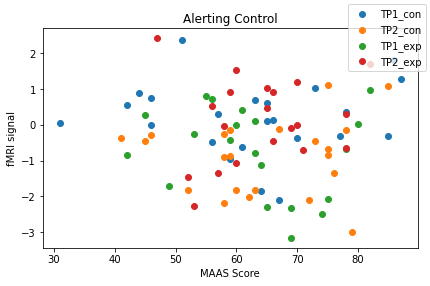

In [30]:
# Correlation between MAAS and fMRI mid-cc Activations (all overlapped)

f, ax = plt.subplots()

ax.scatter(np.array(df_ANT_MAAS_con_BehaviouralEffects['MAAS_con_TP1']),fMRI_con_TP1, label = 'TP1_con')
ax.scatter(np.array(df_ANT_MAAS_con_BehaviouralEffects['MAAS_con_TP2']),fMRI_con_TP2, label = 'TP2_con')
ax.scatter(np.array(df_ANT_MAAS_exp_BehaviouralEffects['MAAS_exp_TP1']),fMRI_exp_TP1, label = 'TP1_exp')
ax.scatter(np.array(df_ANT_MAAS_exp_BehaviouralEffects['MAAS_exp_TP2']),fMRI_exp_TP2, label = 'TP2_exp')
ax.set_title('Alerting Control')
ax.set_xlabel('MAAS Score')
ax.set_ylabel('fMRI signal')


f.legend()

f.tight_layout()


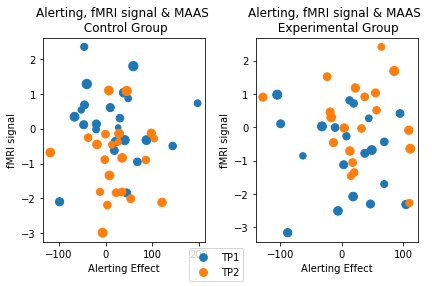

In [31]:
## Figure summarizing results
f, ax = plt.subplots(nrows=1, ncols=2)

#ax[0].scatter(np.array(df_ANT_MAAS_con_BehaviouralEffects['alerting_TP1_untransformed']),fMRI_con_TP1,np.array(df_ANT_MAAS_con_BehaviouralEffects['MAAS_con_TP1']), label = 'TP1')
#ax[0].scatter(np.array(df_ANT_MAAS_con_BehaviouralEffects['alerting_TP2_untransformed']),fMRI_con_TP2,np.array(df_ANT_MAAS_con_BehaviouralEffects['MAAS_con_TP2']), label = 'TP2')
#ax[1].scatter(np.array(df_ANT_MAAS_exp_BehaviouralEffects['alerting_TP1_untransformed']),fMRI_exp_TP1,np.array(df_ANT_MAAS_exp_BehaviouralEffects['MAAS_exp_TP1']))
#ax[1].scatter(np.array(df_ANT_MAAS_exp_BehaviouralEffects['alerting_TP2_untransformed']),fMRI_exp_TP2,np.array(df_ANT_MAAS_exp_BehaviouralEffects['MAAS_exp_TP2']))

ax[0].scatter(alerting_con_TP1,fMRI_con_TP1,np.array(df_ANT_MAAS_con_BehaviouralEffects['MAAS_con_TP1']), label = 'TP1')
ax[0].scatter(alerting_con_TP2,fMRI_con_TP2,np.array(df_ANT_MAAS_con_BehaviouralEffects['MAAS_con_TP2']), label = 'TP2')
ax[1].scatter(alerting_exp_TP1,fMRI_exp_TP1,np.array(df_ANT_MAAS_exp_BehaviouralEffects['MAAS_exp_TP1']))
ax[1].scatter(alerting_exp_TP2,fMRI_exp_TP2,np.array(df_ANT_MAAS_exp_BehaviouralEffects['MAAS_exp_TP2']))

ax[0].set_title('Alerting, fMRI signal & MAAS \n Control Group')
ax[0].set_xlabel('Alerting Effect')
ax[0].set_ylabel('fMRI signal')

ax[1].set_title('Alerting, fMRI signal & MAAS \n Experimental Group')
ax[1].set_xlabel('Alerting Effect')
ax[1].set_ylabel('fMRI signal')

f.legend(loc = 'lower center')

f.tight_layout()

#df_ANT_MAAS_con_BehaviouralEffects

### Mediation Analysis

In [32]:
from pingouin import mediation_analysis

# Alerting Effect
#Mediation for control group TP1
stats_con_TP1, dist_con_TP1 = mediation_analysis(data=df_ANT_MAAS_con_BehaviouralEffects, x='fMRI_TP1', m='MAAS_con_TP1', y='alerting_TP1',return_dist=True)

#Mediation for control group TP1
stats_con_TP2, dist_con_TP2 = mediation_analysis(data=df_ANT_MAAS_con_BehaviouralEffects, x='fMRI_TP2', m='MAAS_con_TP2', y='alerting_TP2',return_dist=True)

#Mediation for experimental group TP1
stats_exp_TP1, dist_exp_TP1 = mediation_analysis(data=df_ANT_MAAS_exp_BehaviouralEffects, x='fMRI_TP1', m='MAAS_exp_TP1', y='alerting_TP1',return_dist=True)

#Mediation for experimental group TP2
stats_exp_TP2, dist_exp_TP2 = mediation_analysis(data=df_ANT_MAAS_exp_BehaviouralEffects, x='fMRI_TP2', m='MAAS_exp_TP2', y='alerting_TP2',return_dist=True)

ModuleNotFoundError: No module named 'pingouin'

In [ ]:
stats_con_TP1

In [ ]:
stats_con_TP2

In [ ]:
stats_exp_TP1

In [ ]:
stats_exp_TP2

In [ ]:
## add change in MAAS, Alerting Effect, and Activation for second mediation Analysis

df_ANT_MAAS_exp_BehaviouralEffects['MAAS_change'] = df_ANT_MAAS_exp_BehaviouralEffects['MAAS_exp_TP2'] - df_ANT_MAAS_exp_BehaviouralEffects['MAAS_exp_TP1'] 
df_ANT_MAAS_exp_BehaviouralEffects['alerting_change'] = df_ANT_MAAS_exp_BehaviouralEffects['alerting_TP2'] - df_ANT_MAAS_exp_BehaviouralEffects['alerting_TP1']
df_ANT_MAAS_exp_BehaviouralEffects['fMRI_change']= df_ANT_MAAS_exp_BehaviouralEffects['fMRI_TP2'] - df_ANT_MAAS_exp_BehaviouralEffects['fMRI_TP1']

df_ANT_MAAS_con_BehaviouralEffects['MAAS_change'] = df_ANT_MAAS_con_BehaviouralEffects['MAAS_con_TP2'] - df_ANT_MAAS_con_BehaviouralEffects['MAAS_con_TP1'] 
df_ANT_MAAS_con_BehaviouralEffects['alerting_change'] = df_ANT_MAAS_con_BehaviouralEffects['alerting_TP2'] - df_ANT_MAAS_con_BehaviouralEffects['alerting_TP1']
df_ANT_MAAS_con_BehaviouralEffects['fMRI_change']= df_ANT_MAAS_con_BehaviouralEffects['fMRI_TP2'] - df_ANT_MAAS_con_BehaviouralEffects['fMRI_TP1']

df_ANT_MAAS_con_BehaviouralEffects['alerting_TP1_untransformed'] = df_ANT_MAAS_con['Alerting_con_TP1']
df_ANT_MAAS_con_BehaviouralEffects['alerting_TP2_untransformed'] = df_ANT_MAAS_con['Alerting_con_TP2']
df_ANT_MAAS_con_BehaviouralEffects['alerting_changed_untransformed'] = df_ANT_MAAS_con['Alerting_con_TP2']-df_ANT_MAAS_con['Alerting_con_TP1']

df_ANT_MAAS_exp_BehaviouralEffects['alerting_TP1_untransformed'] = df_ANT_MAAS_exp['Alerting_exp_TP1']
df_ANT_MAAS_exp_BehaviouralEffects['alerting_TP2_untransformed'] = df_ANT_MAAS_exp['Alerting_exp_TP2']
df_ANT_MAAS_exp_BehaviouralEffects['alerting_changed_untransformed'] = df_ANT_MAAS_exp['Alerting_exp_TP2']-df_ANT_MAAS_exp['Alerting_exp_TP1']
#df_ANT_MAAS_exp_BehaviouralEffects
df_ANT_MAAS_con_BehaviouralEffects

In [ ]:
# Alerting Effect
#Mediation for change in all variables between tp1 and tp2
stats_change_con, dist_change_con = mediation_analysis(data=df_ANT_MAAS_con_BehaviouralEffects, x='fMRI_change', m='MAAS_change', y='alerting_changed_untransformed',return_dist=True)

stats_change_exp, dist_change_exp = mediation_analysis(data=df_ANT_MAAS_exp_BehaviouralEffects, x='fMRI_change', m='MAAS_change', y='alerting_changed_untransformed',return_dist=True)

## mediation Analysis between fMRI Activation TP2, change in mindfulness, and Alerting Score TP2
stats_exp_TP2_change, dist_exp_TP2_change = mediation_analysis(data=df_ANT_MAAS_con_BehaviouralEffects, x='fMRI_TP2', m='MAAS_change', y='alerting_TP2_untransformed',return_dist=True)



In [ ]:
stats_change_con

In [ ]:
stats_change_exp

In [ ]:
stats_exp_TP2_change

#### Unfortunately the Mediation Analysis was not significant

In [ ]:
# Finally figure.. Analysing the change 
from mpl_toolkits.mplot3d import Axes3D


f = plt.figure()
ax = f.add_subplot(111, projection='3d')

ax.scatter(np.array(df_ANT_MAAS_con_BehaviouralEffects['alerting_changed_untransformed']),np.array(df_ANT_MAAS_con_BehaviouralEffects['fMRI_change']),np.array(df_ANT_MAAS_con_BehaviouralEffects['MAAS_change']), label='con')
ax.scatter(np.array(df_ANT_MAAS_exp_BehaviouralEffects['alerting_changed_untransformed']),np.array(df_ANT_MAAS_exp_BehaviouralEffects['fMRI_change']),np.array(df_ANT_MAAS_exp_BehaviouralEffects['MAAS_change']), label='exp')

ax.set_title('Change in Alerting, fMRI signal & MAAS')
ax.set_xlabel('Alerting Effect')
ax.set_ylabel('fMRI signal')
ax.set_zlabel('MAAS score')

f.legend()
#ax.azim = 200
#ax.elev = -45

f.tight_layout()

In [ ]:
# I couldn't make this library work

#from mayavi import mlab
#import numpy as np
#x, y, z, value = np.random.random((4, 40))
#mylab.points3d(np.array(df_ANT_MAAS_con_BehaviouralEffects['alerting_change']),np.array(df_ANT_MAAS_con_BehaviouralEffects['fMRI_change']),np.array(df_ANT_MAAS_con_BehaviouralEffects['MAAS_change']), 1)
#mylab.show()